# **Import Libraries**

In [ ]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.4 MB/s 
     |████████████████████████████████| 944 kB 41.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

In [ ]:
import matplotlib

print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)

3.2.2
0.11.2
1.3.5


# **Load Data** <br>
Data yang digunakan yaitu [Used Car Auction Prices](https://www.kaggle.com/datasets/tunguz/used-car-auction-prices) dari kaggle.com.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_prices.csv', on_bad_lines='skip')

# **1. Descriptive Statistics** <br>
Hal yang perlu diperhatikan:



- A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
- B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)



## 1.1 DataFrame General Information

__Deskripsi:__
- Make : The brand of the car.
- Model : The edition of the car of a specific brand.
- Trim : The trim levels for a car are just different versions of the model.
- Body : The body style of a vehicle refers to the shape and model of a particular car make.
- Transmission : The mechanism that moves the power from the engine to the wheels.
- VIN : Vehichle identification number.
- State : The state in which the car is auctioned.
- Condition : The condition of the cars being at the time of auction.
- Odometer : The distance the car has travelled since manufactured.
- Color : Exterior color of the car.
- Interior : Interior color of the car.
- Seller : The seller of the car, car dealers.
- mmr : Manhiem market record, the market estimated price of the cars. (perkiraan harga pasar mobil) [see this](https://press.manheim.com/company-overview)
- sellingprice : The price a car was sold at auctions. (hrg mobil yg dijual di pelelangan)
- saledate : The date on which the car has been sold.

__MMR:__ <br>
What really intersting is that mmr and sellingprice are so highly correlated. I did not find an explanation in wikipedia. But with Google I found this https://www.autoauctionmall.com/learning-center/what-does-mmr-mean/.

MMR in the car business stands for Manheim Market Report, an indicator of wholesale prices.

Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company and its MMR is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period to .

I think that explained why mmr and sellingprice are so close to each other in the figure. mmr is a evaluation made by the Manheim company.The company should make full use of all the infomation of car like model,odometer and so on.

So it is not a good idea to take mmr as a explanatory feature.

In [ ]:
df.shape # (jumlah baris, jumlah kolom)

(558811, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


**HASIL PENGAMATAN:**
*   Dataset terdiri dari 558,811 baris dan 16 kolom.
*   Terdapat 9 kolom yang missing value (Non-null count < Jumlah baris) yaitu: `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`.
*   Untuk kolom `saledate` tipe datanya bukan datetime melainkan object, sehingga perlu dicek lagi entrinya. Selain itu, sepertinya tidak ada kolom lain dengan tipe data yang aneh.

## 1.2 Data Types (Numerical & Non-Numerical Features) <br>

### 1.2.1 Numerical Features <br>

In [ ]:
num = ["year", "condition", "odometer", "mmr", "sellingprice"]

**HASIL PENGAMATAN:** <br>
- Terdapat 5 kolom numerik
- kolom numerik terdiri dari (year, condition, mmr, dan sellingprice)

### 1.2.2 Non-Numerical Features

In [ ]:
cat = ["make", "model", "trim", "body", "transmission", "vin", "state", "color", "interior", "seller", "saledate"]

**HASIL PENGAMATAN:** <br>
- Terdapat 11 kolom kategorikal
- kolom numerik terdiri dari (make, model, trim, body, transmission, vin, state, color, state, color, interior, seller, saledate)

## 1.3 Checking Duplicated Data <br>
Cek data duplikat di keseluruhan DataFrame.

In [ ]:
df.duplicated().sum()

0

**HASIL PENGAMATAN:** <br>
tidak terdapat data yang duplikat pada tabel df.

## 1.4 Missing Value Calculation

In [ ]:
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv, pmv], axis=1)
mdf.columns = ['Missing Value Total', 'Missing Value Percentage (%)']
mdf

,Missing Value Total,Missing Value Percentage (%)
year,0,0.000000
make,10301,1.843378
model,10399,1.860915
trim,10651,1.906011
body,13195,2.361263
transmission,65353,11.695010
vin,0,0.000000
state,0,0.000000
condition,11794,2.110553
odometer,94,0.016821



**HASIL PENGAMATAN:** <br>
Berdasarkan output di atas, terdapat 9 kolom yang memiliki missing value, yaitu kolom `make`, `model`, `trim`, `body`, `transmission`, `color`, `odometer`, `condition`, dan `interior`. Teramati 8 kolom memiliki persentase missing value < 2.5% sehingga dapat dikategorikan masih relatif aman. Akan tetapi, terdapat 1 kolom yang memiliki persentase missing value mencapai 11.7% dari total keseluruhan baris, yakni kolom `transmission`.


Kita dapat memanfaatkan library **missingno** untuk mengamati persebaran missing value di setiap kolom.

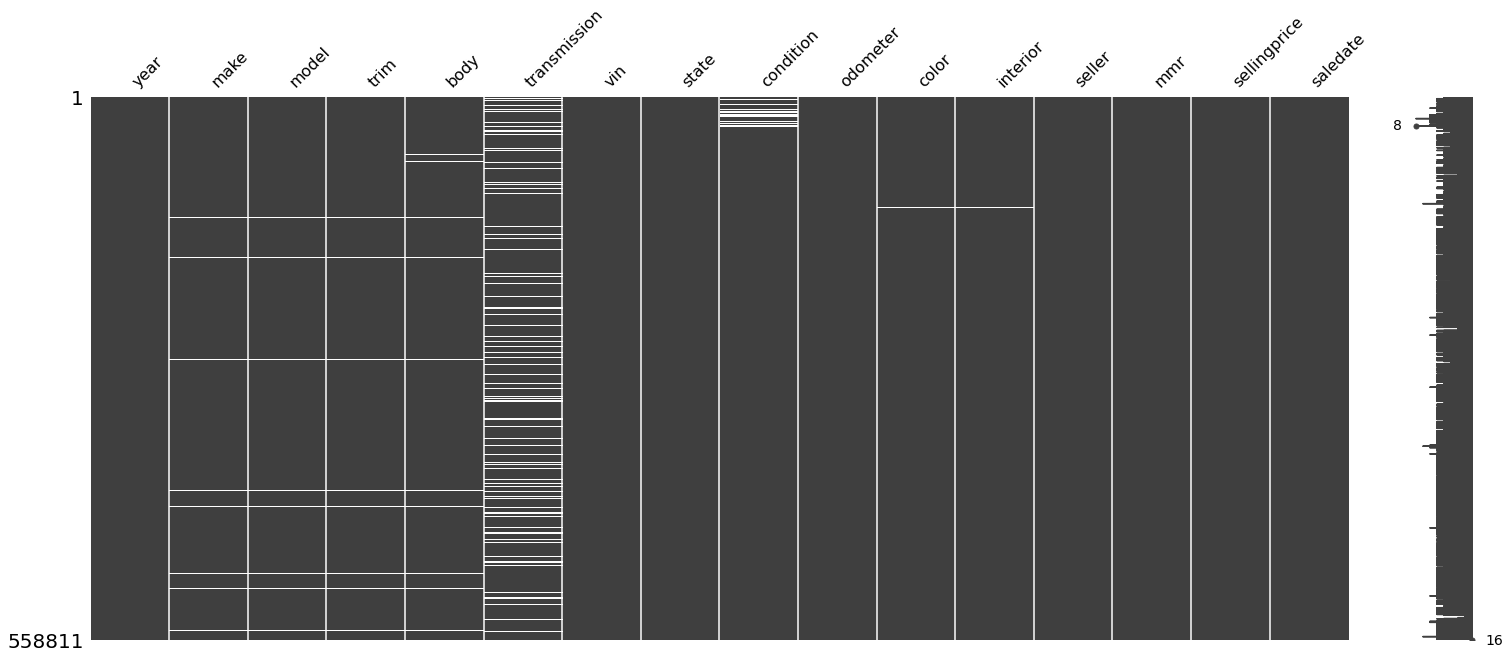

In [ ]:
# Plot of Missing Values using matrix and heatmap missingno
import missingno as msno
msno.matrix(df);

Kita juga dapat melihat korelasi dari missing value di satu kolom dengan kolom lainnya menggunakan [heatmap di **missingno**](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009#:~:text=Using%20missingno%20to%20Identify%20Missing,advantages%20for%20identifying%20missing%20data/).

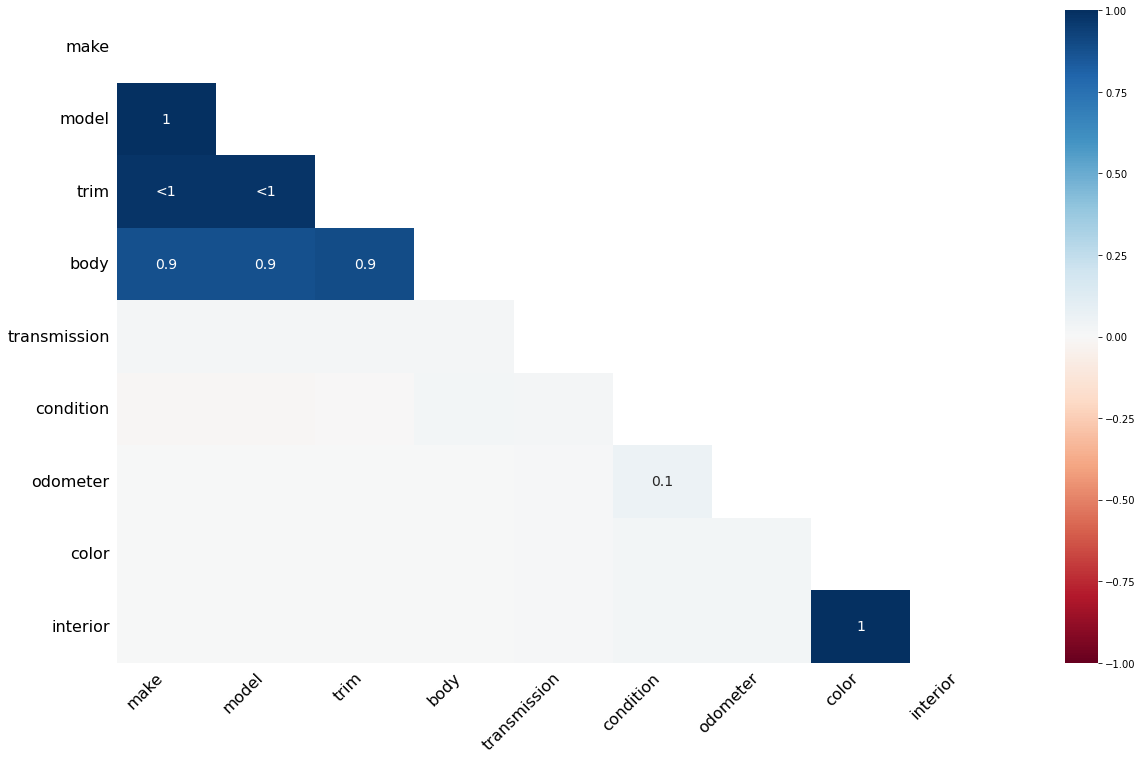

In [ ]:
msno.heatmap(df);

**HASIL PENGAMATAN:** <br>
Berdasarkan heatmap di atas, kita dapat melihat bahwa pasangan antara dua kolom di bawah ini memiliki korelasi positif yang sangat tinggi (mendekati 1).
- body-make
- body-model
- body-trim
- trim-make
- trim-model
- model-make
- interior-color

Artinya, ketika suatu baris di suatu kolom memiliki missing value, maka baris yang sama juga merupakan missing value di kolom lainnya. Contoh, kolom `model` dan kolom `make` memiliki nilai korelasi +1, maka semua baris yang missing value di kolom `model` merupakan semua baris yang juga missing value di kolom `make`. Hal tersebut dapat dibuktikan juga dari plot matrix yang telah dilakukan di tahap sebelumnya (posisi garis putih sebagai indikator missing value yang sama di kolom `model` dan kolom `make`.


Oleh karena itu, salah satu solusi yang dapat dipilih untuk mengatasi missing value dari kolom `model`, `make`, `trim`, dan `body` adalah dengan cara **menghapusnya**, karena missing value terletak pada baris yang sama di hampir keseluruhan kolom-kolom tersebut. Sedangkan, untuk prosedur imputation sepertinya akan terlalu riskan untuk dilakukan, karena kita perlu mengisi suatu baris yang kosong di keempat kolom sekaligus.



## 1.5 Descriptive statiscs of numerical features <br>
Hal-hal yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah terdapat keanehan dengan nilai maksimal dan nilai minimal di setiap kolom/feature?
- Bagaimana kira-kira distribusi data berdasarkan analisis singkat dari nilai mean dan median?


In [ ]:
df[num].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [ ]:
o99 = (df['odometer'][(df['odometer']==999999) & (df['year']>=1982)].count())
p99 = o99/(df['odometer'].count())*100

print(f'mobil tertua yang mungkin ada pada lelang adalah {df.year.max()-df.year.min()} tahun')
print(f'total mobil yang dijual dan berodometer 999999 adalah {o99} dengan persentasenya sebesar {p99}% ')

mobil tertua yang mungkin ada pada lelang adalah 33 tahun
total mobil yang dijual dan berodometer 999999 adalah 72 dengan persentasenya sebesar 0.012886667132018536% 


Berdasarkan laman web [PolicyAdvice](https://policyadvice.net/insurance/insights/how-much-do-americans-drive/) dan [metromile](https://www.metromile.com/blog/average-miles-driven-per-year-by-americans/), pengendara mobil di amerika rata-rata menempuh jarak sejauh (rata-rata) 13.500 km dalam satu tahunnya (laki-laki sejauh 16.550 km dan perempuan sejauh 10.412) yang berarti butuh sekitar 97 tahun bagi seorang laki-laki untuk menghasilkan odometer 999.999 miles / (1609342.39km).

Oleh karena itu, value odometer 999999 akan diubah.



**HASIL PENGAMATAN:** <br>
indra:
- Nilai minimum `mmr` sebesar 25 mengundang kecurigaan. Mobil seperti apa yang mmr-nya hanya sebesar 25 USD?
- Nilai minimum `sellingprice` sebesar 1 juga menimbulkan pertanyaan "Mobil apa yang harganya 1 USD?".
- Nilai maksimum pada kolom `mmr` dan `sellingprice` sangat tinggi dibandingkan dengan nilai mean/median-nya. 



siapa? Terdapat banyak data yang value-nya sama namun dengan penulisan yang berbeda (baik karma terdapat huruf kapital/disingkat)


## 1.6 Descriptive statiscs of Non-Numerical Features <br>
Hal-hal yang perlu diperhatikan:
- Apakah jumlah unique values di setiap kolom masuk akal?
- Apakah ada ketimpangan jumlah nilai dari setiap unique values? Misal ada 1 nilai yang dominan

In [ ]:
df[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


**HASIL PENGAMATAN:** <br>
- Kolom dengan jumlah unique values < 10 hanyalah kolom `transmission`.
- Kolom lainnya memiliki unique values >= 17, bahkan ada kolom yang jumlah unique values-nya mencapai 550,296.

Sekarang, kita coba tamplikan semua unique values dari setiap kolom. Hal ini perlu dilakukan untuk mengetahui apakah ada value yang tidak konsisten pada data kita.

In [ ]:
# Unique Values of Non-Numerical Features
for i in cat:
    total = df[i].nunique()
    print(f'unique value kolom {i}:', 'total:', total)
    print(f'{df[i].unique()}\n')

unique value kolom make: total: 96
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']

unique value kolom model: 

**HASIL PENGAMATAN:** <br>

kolom `make`:
  - Ada entri yang tidak konsisten penamaannya, contohnya: Kia dan kia; Porsche dan porsche;  Lincoln dan lincoln; plymouth dan Plymouth;.

- kolom `model`:
  - Ada entri yang tidak konsisten penamaannya, contohnya: Impala dan impala; Camaro dan camaro; dll.
  - Ada entri yang penamaannya spesifik dan tidak spesifik, contohnya: Impala dan Impala Limited (*sepertinya ini tidak*).

- kolom `body`:
  - Ada entri yang tidak konsisten penamaannya, contohnya: SUV dan suv; Camaro dan camaro; dll.
  - Ada entri yg body-nya spesifik pakai seri dan ada yang umum saja, contohnya: convertible dan q60 convertible; Sedan dan sedan.

- kolom `trim`: di-drop.

- kolom `transmission`: sepertinya 

- kolom `vin`: kolom ini akan di-drop karena in setiap mobil pastilah berbeda, sehingga dapat disimpulkan bahwa korelasi antara vin dan salesprice akan mendekati 0.

- kolom `state`: Aman, tidak ada masalah.

- kolom `color`:
  - Ada entri berisi **-**, mungkin untuk menandakan warna mobil yang tidak diketahui(?). Bisa diganti dengan *unknown*.

- kolom `interior`:
  - Ada entri berisi **-**, mungkin untuk menandakan interior mobil yang tidak diketahui(?). Bisa diganti dengan *unknown*.

- kolom `seller`: sepertinya kolom ini akan di-drop karena jumlah unique value-nya 14,264.



Kita perlu menyamakan nilai yang tidak konsisten pada setiap kolom saat berada di tahap Data Preparation.

In [ ]:
cats = pd.DataFrame()
for i in cat:
    catlow = df[i].str.lower()
    cats = cats.merge(catlow, how='outer', left_index=True, right_index=True)

cats.describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,66,851,1901,45,2,550296,38,20,17,14264,3745
top,ford,altima,base,sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,tue feb 10 2015 01:30:00 gmt-0800 (pst)
freq,93997,19349,55842,241343,475914,5,82945,110970,244325,19693,5334


In [ ]:
b_cat = df[cat].describe()
a_cat = cats.describe()

dif_cat = b_cat.iloc[1, :]-a_cat.iloc[1, :]
dif_cat

make             30
model           122
trim             74
body             41
transmission      0
vin               0
state             0
color             0
interior          0
seller            0
saledate          0
Name: unique, dtype: object

terdapat 4 kolom yang mendapat pengurangan akibat perlakuan `df['col'].str.lower()` yaitu kolom `make`, `model`, `trim`, dan `body`.

Lebih dalam lagi ke dataset kita, sekarang kita tampilkan jumlah nilai dari tiap unique value di setiap kolom.

In [ ]:
# Value Counting of Non-Numerical Features
for i in cat:
    print(f'Value count kolom {i}:')
    print(f'{df[i].value_counts().sort_values(ascending=True).head(5)}\n')

Value count kolom make:
Lotus         1
dot           1
dodge tk      1
mazda tk      1
hyundai tk    1
Name: make, dtype: int64

Value count kolom model:
458 Italia               1
Sidekick                 1
F-250                    1
cavalier                 1
Continental GTC Speed    1
Name: model, dtype: int64

Value count kolom trim:
Power Wagon     1
740Ld xDrive    1
LT Eco          1
GS Plus         1
CL65 AMG        1
Name: trim, dtype: int64

Value count kolom body:
cts wagon      1
g37 coupe      1
Ram Van        1
CTS-V Wagon    1
cab plus 4     1
Name: body, dtype: int64

Value count kolom transmission:
manual        17544
automatic    475914
Name: transmission, dtype: int64

Value count kolom vin:
2fmdk3kc9dbc11783    1
wbskg9c58be796902    1
3gtp1xe28bg185394    1
sajwa0gb6blr84756    1
salsf2d4xba287157    1
Name: vin, dtype: int64

Value count kolom state:
al     26
ns     61
ok     72
nm    171
ab    928
Name: state, dtype: int64

Value count kolom color:
lime        

# **2. Univariate Analysis**

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing

## 2.1 Numerical Features

### 2.1.1 Boxplot
Hal yang perlu diperhatikan dari boxplot adalah keberadaan pencilan (outlier) dari setiap feature.

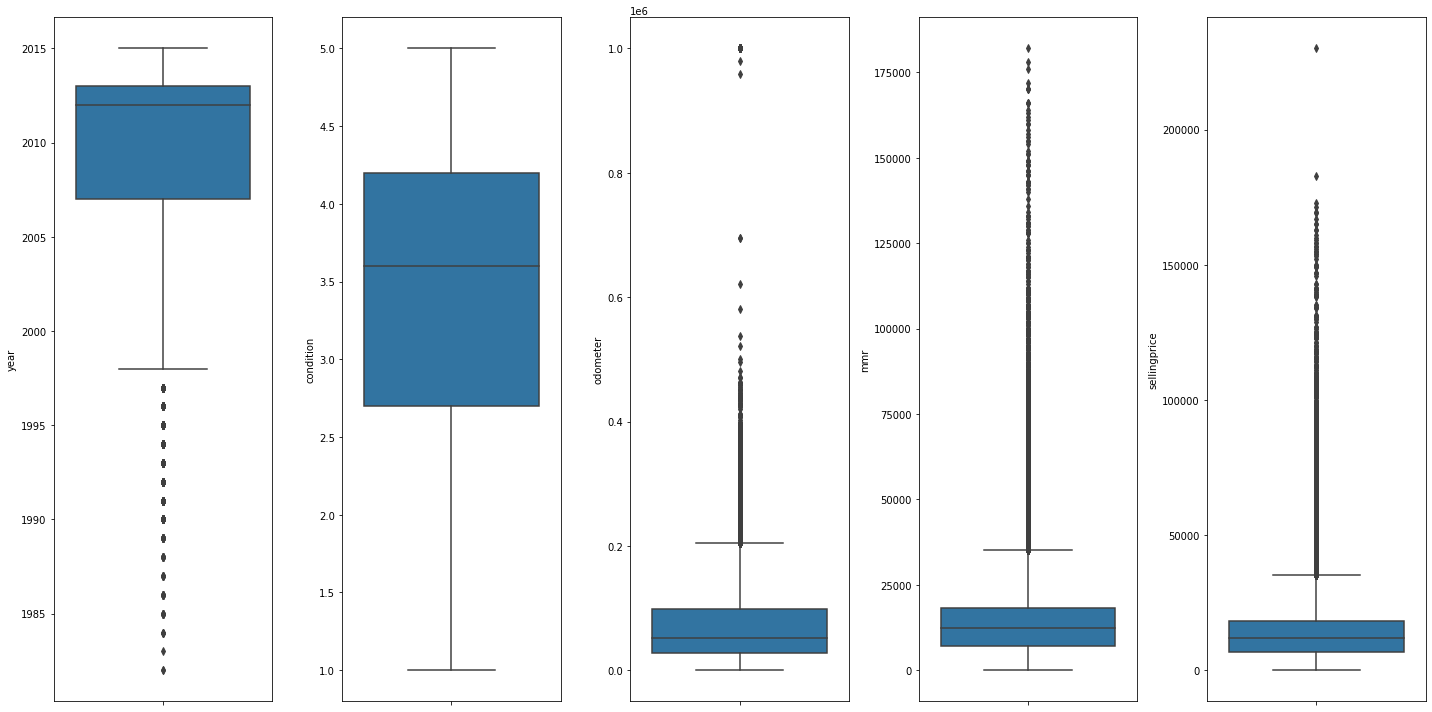

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y = df[num[i]], orient = 'v')
    plt.tight_layout()

**HASIL PENGAMATAN:** <br>
- terdapat outlier pada kolom odometer dan sellingprice

### 2.1.3 Histogram and KDE plot

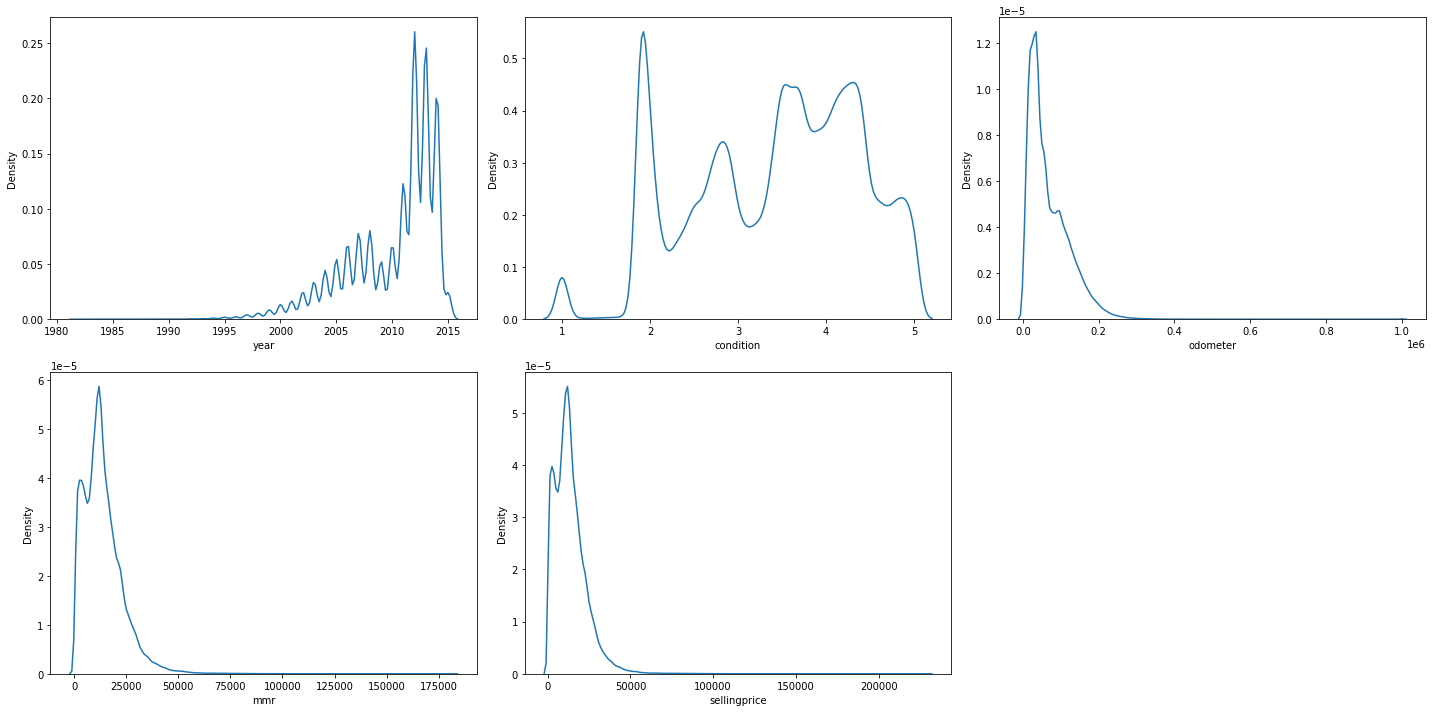

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(num)):
    plt.subplot(2,3, i+1)
    sns.kdeplot(x = df[num[i]])
plt.tight_layout()

**HASIL PENGAMATAN:**
- kebanyakan mobil bekas yg tersedia adalah termasuk tahun yg baru, karena jumlahnya lebih banyak dibanding tahun yg lama (tua)
- hanya kolom conndition yang berdistribusi normal


## 2.2 Non-Numerical Features

### 2.2.1 Barplot/Countplot

<AxesSubplot:xlabel='count', ylabel='interior'>

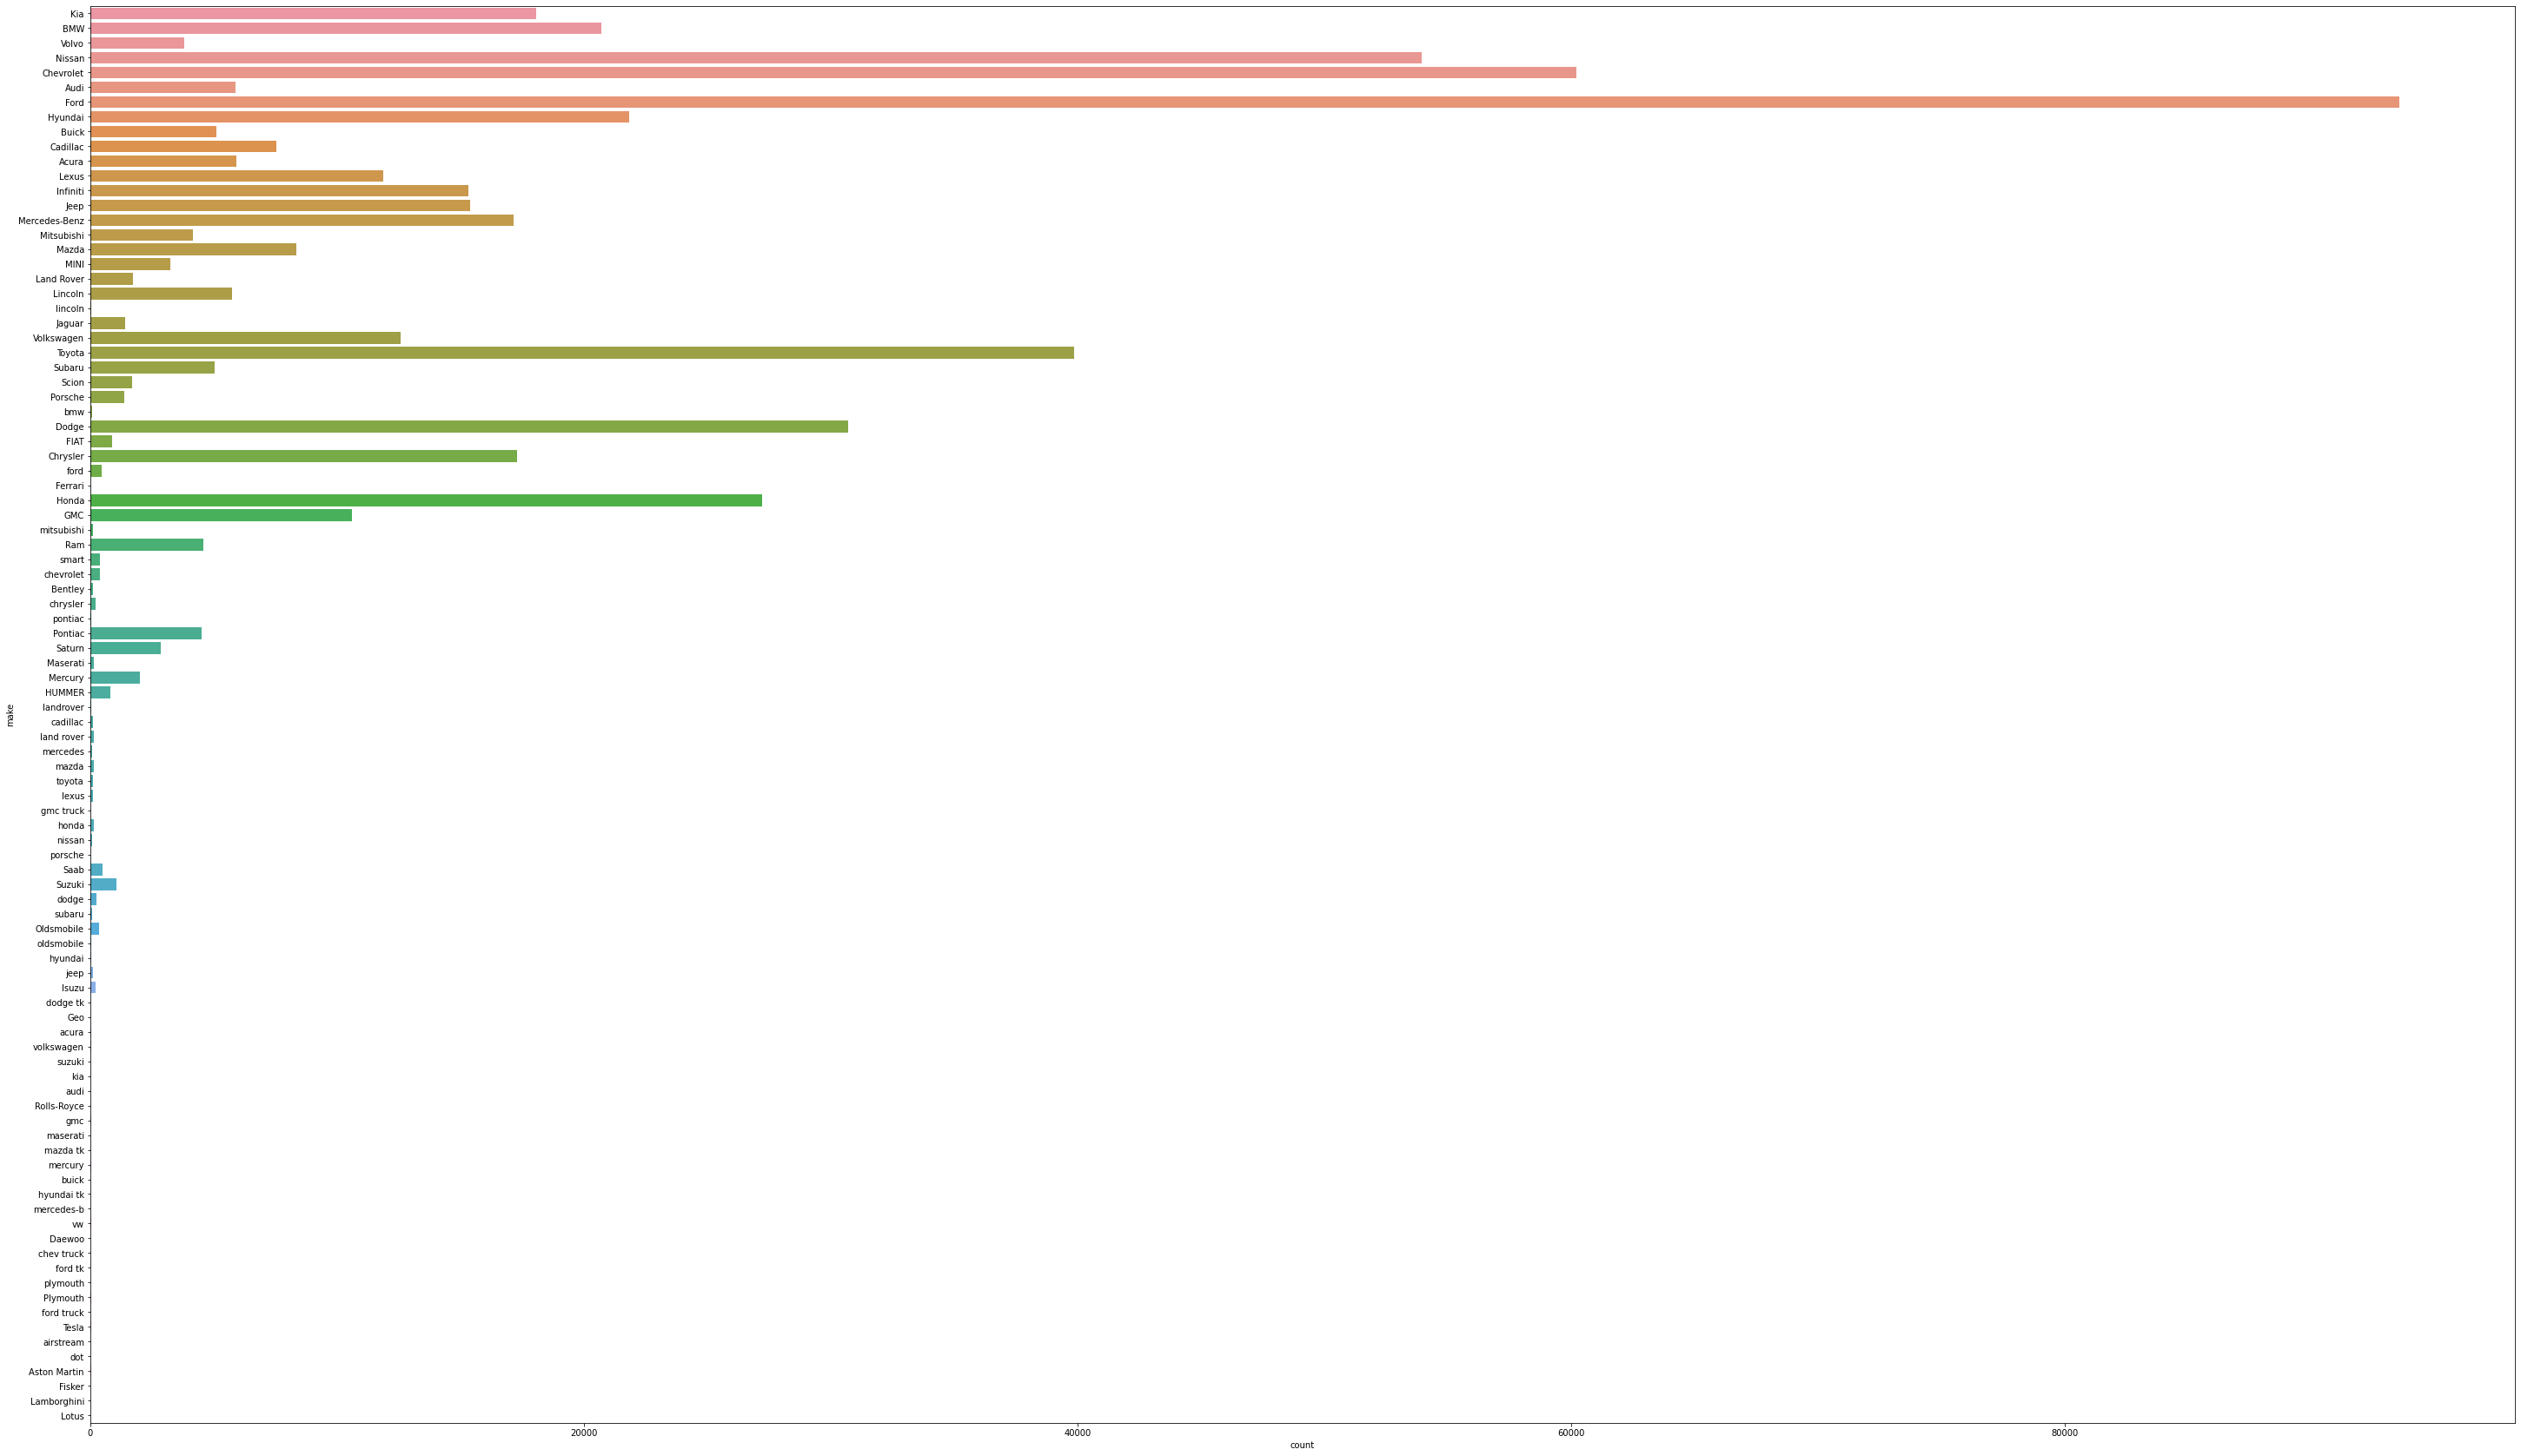

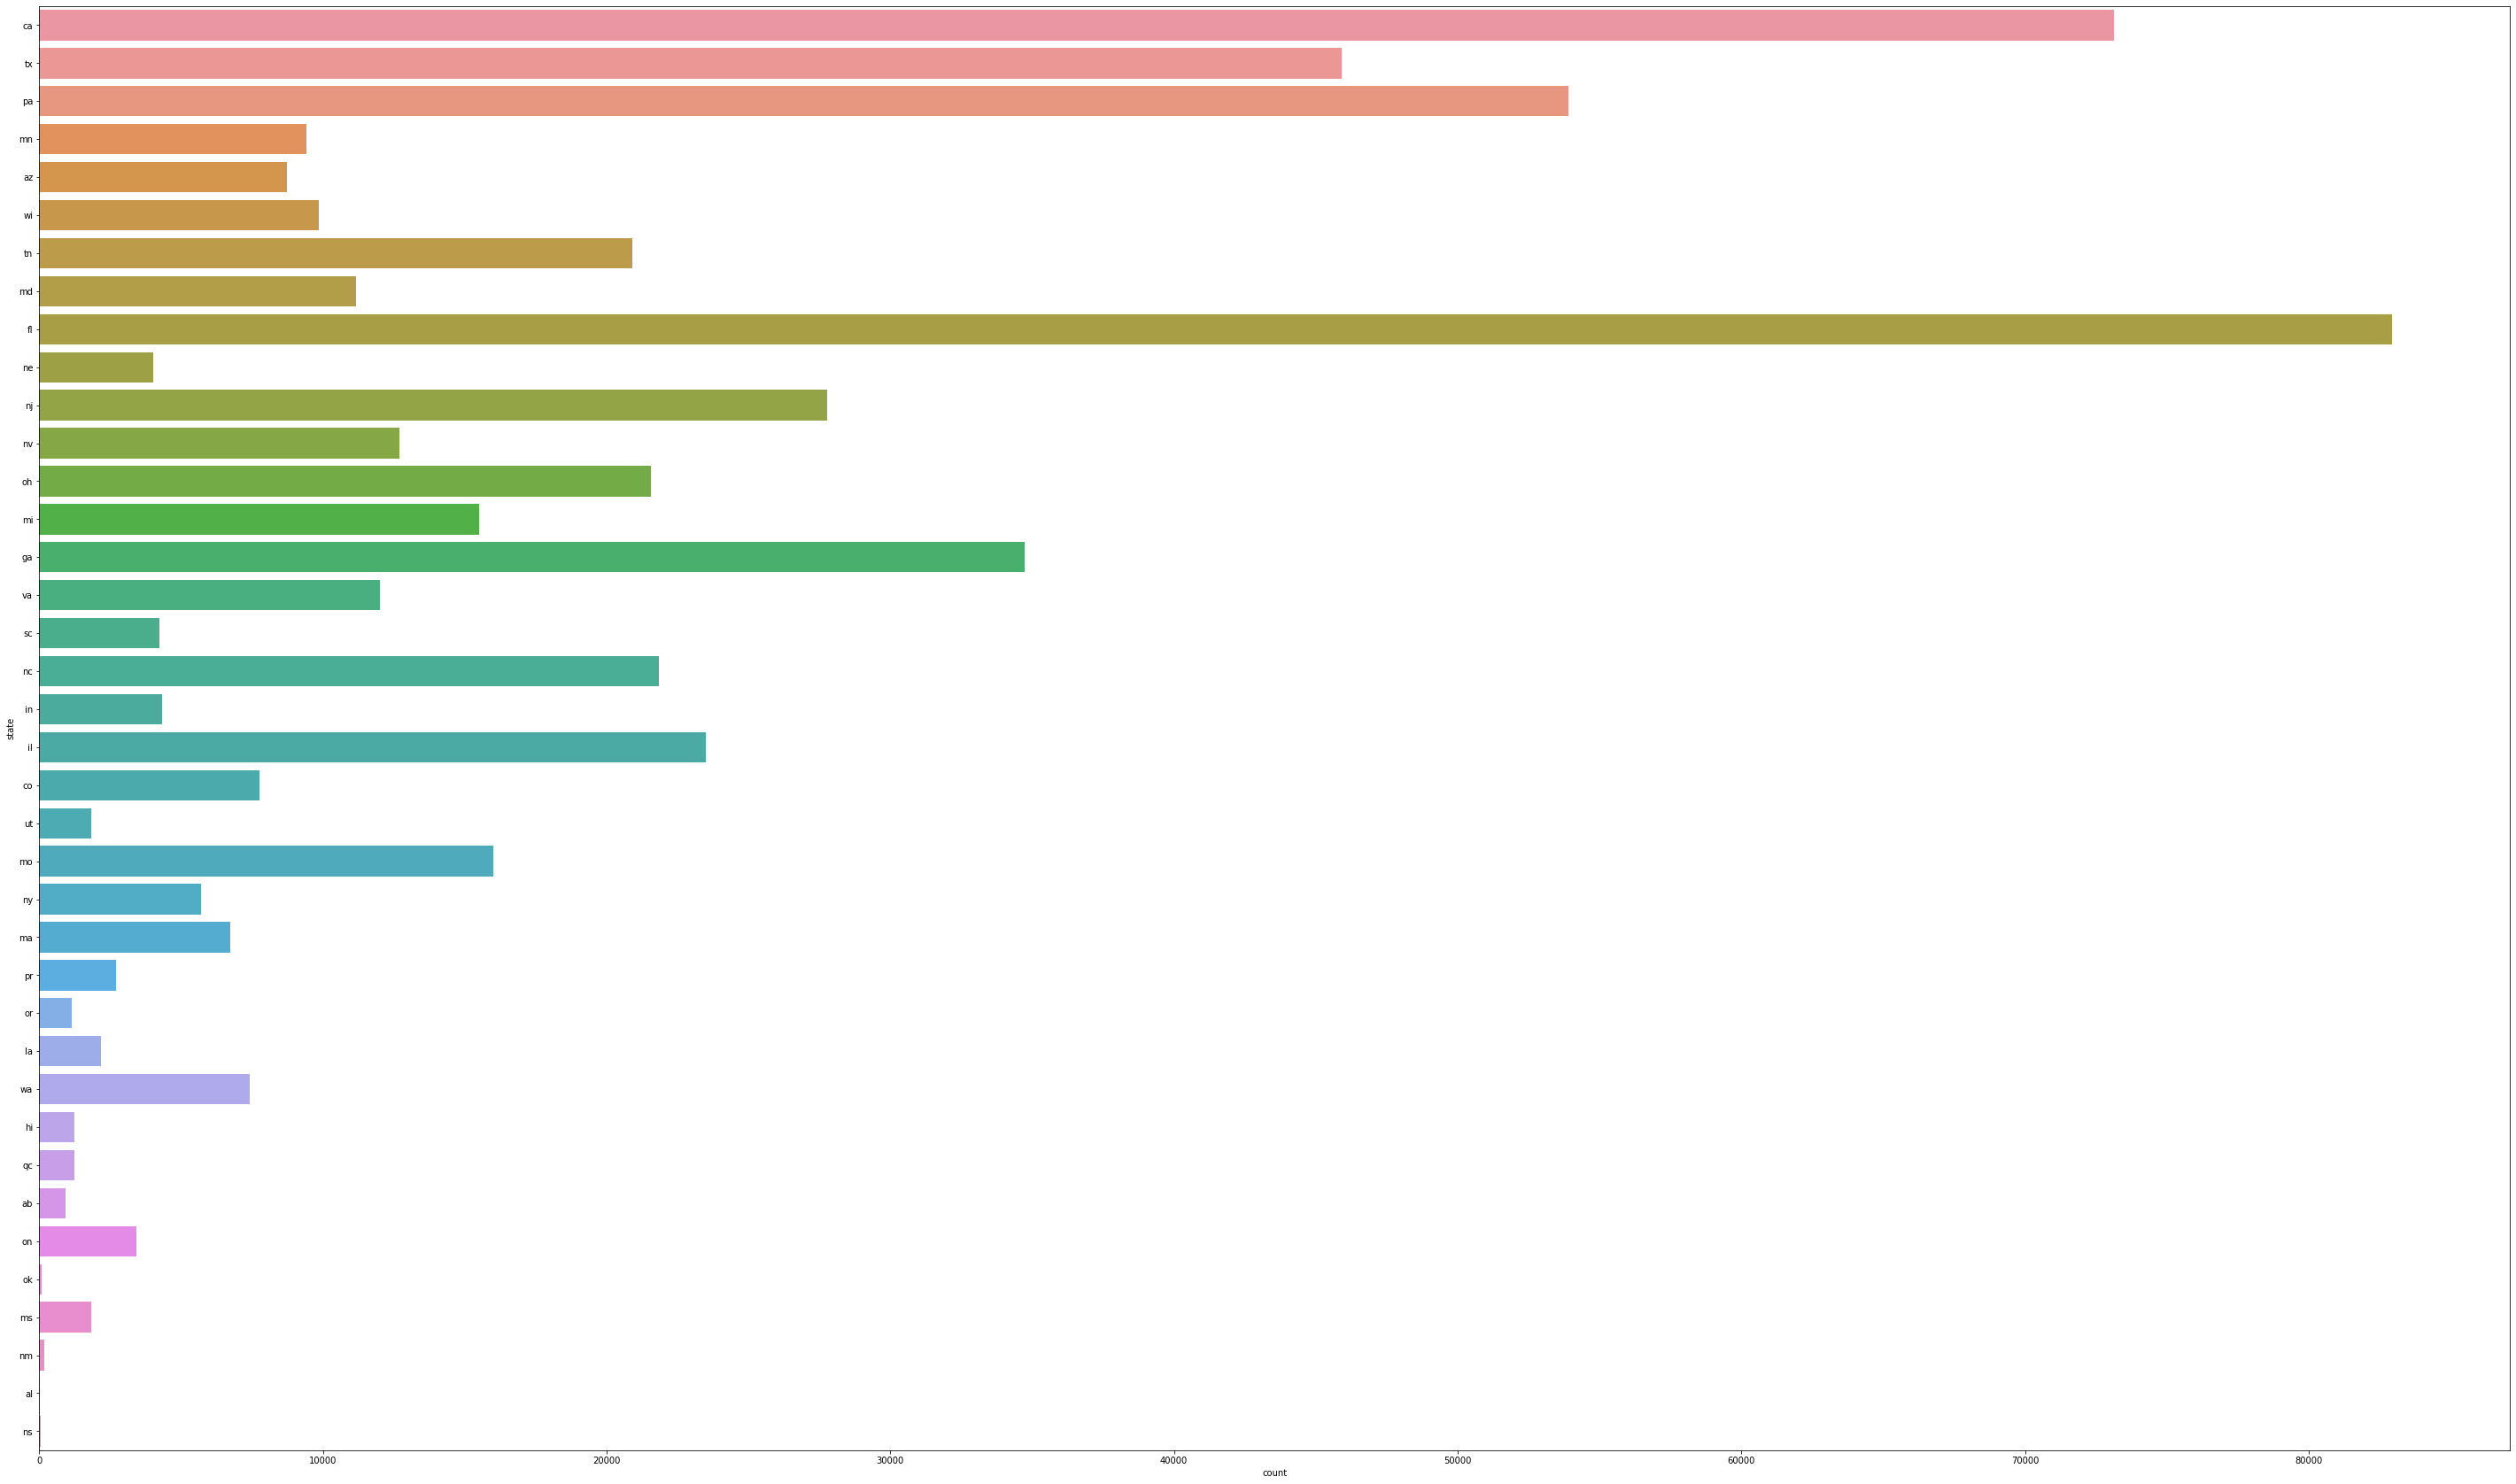

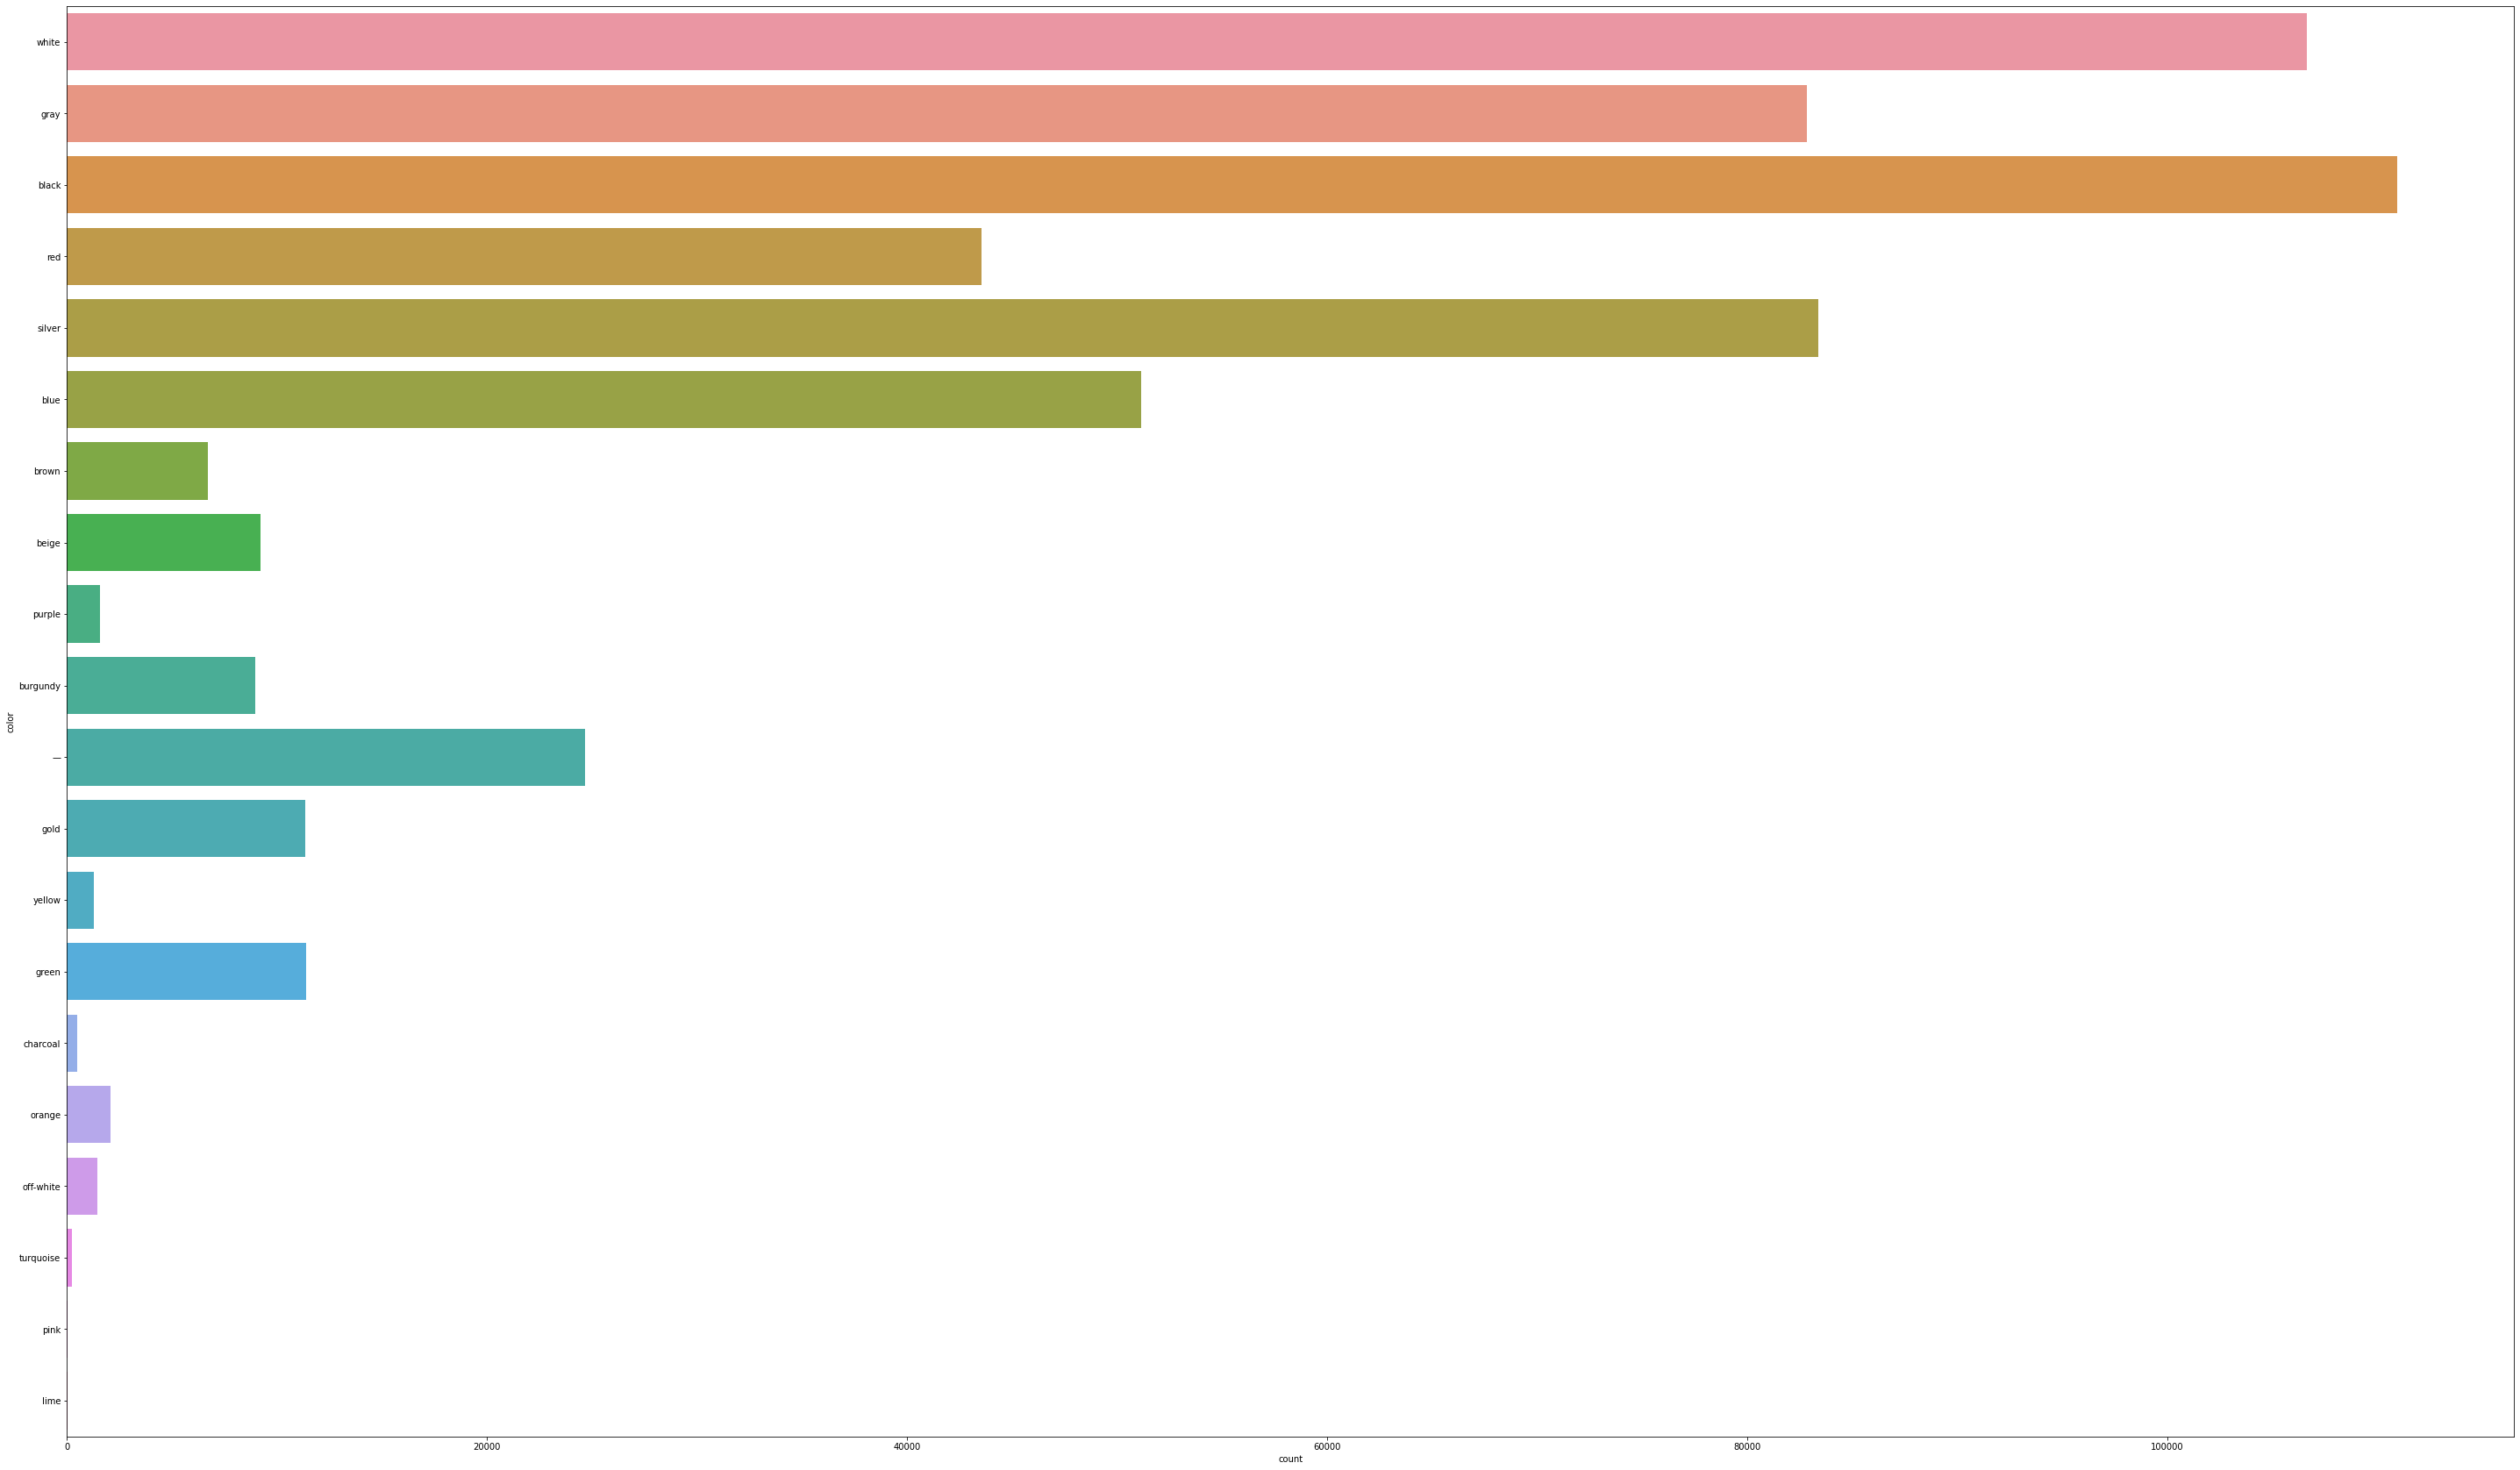

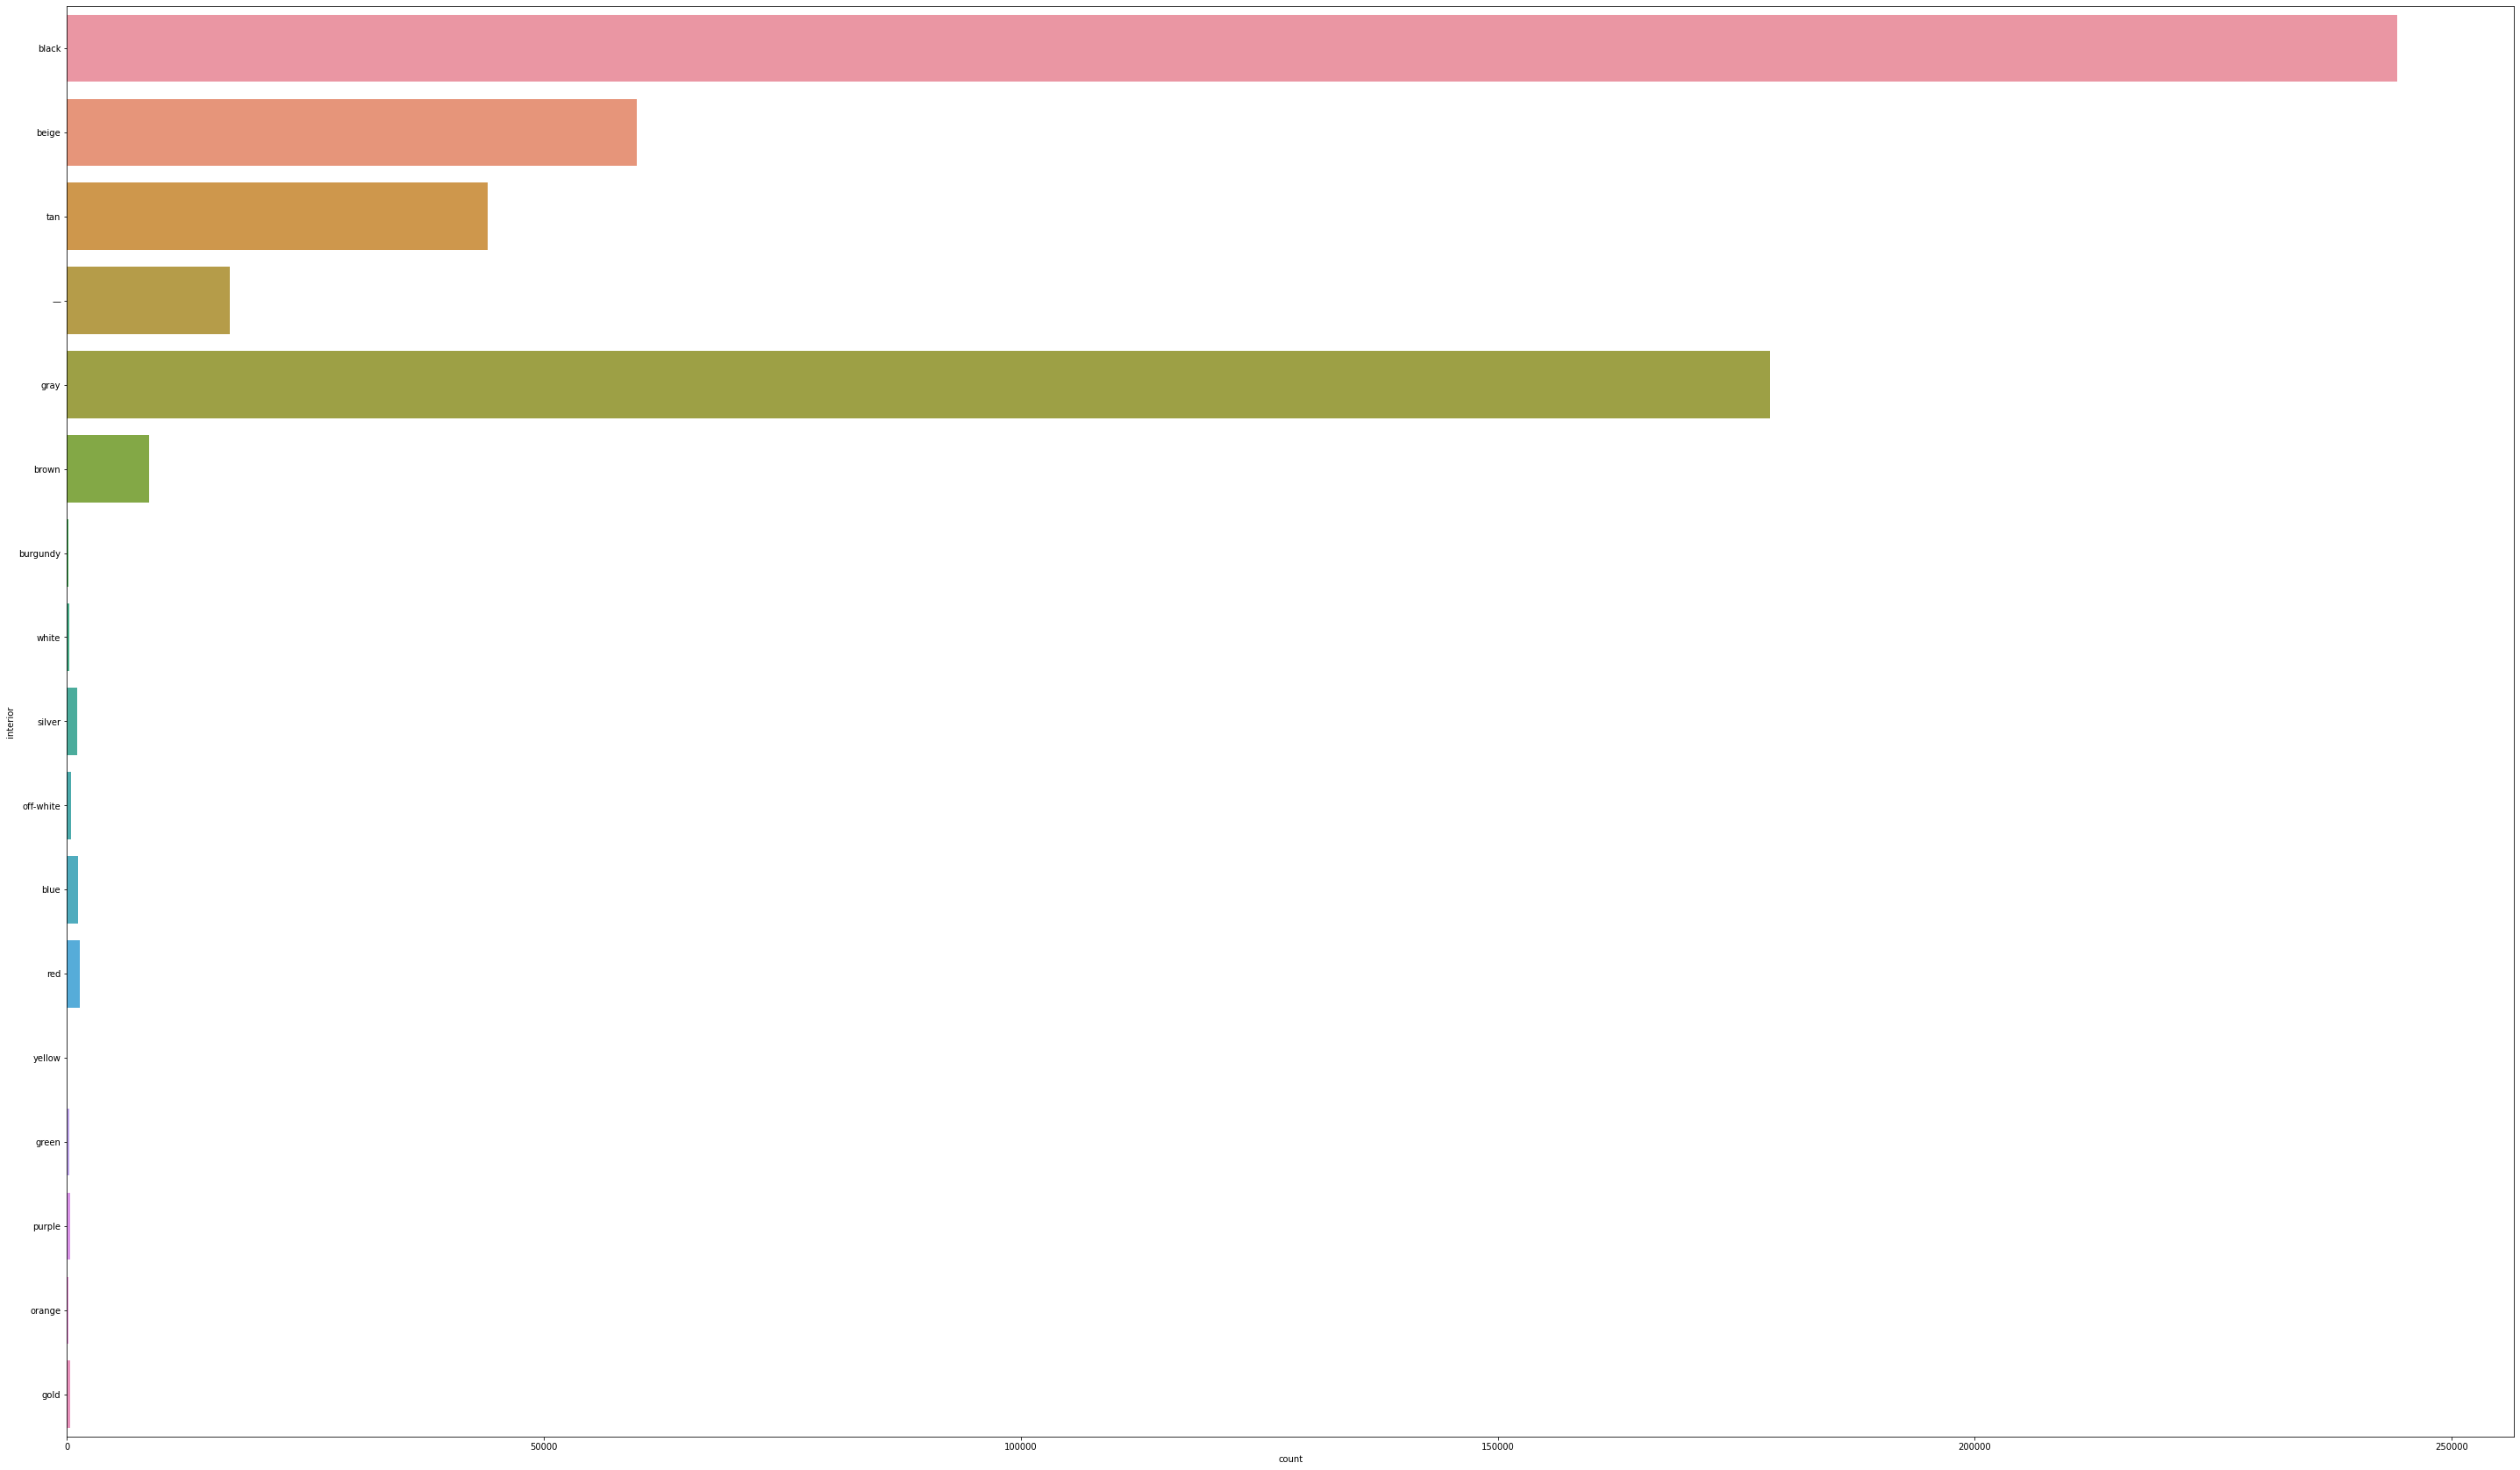

In [ ]:
gmb = df['make'].value_counts().index
plt.figure(figsize=(50,30))
sns.countplot(data=df, y='make')

gmb = df['state'].value_counts().index
plt.figure(figsize=(50,30))
sns.countplot(data=df, y='state')

gmb = df['color'].value_counts().index
plt.figure(figsize=(50,30))
sns.countplot(data=df, y='color')

gmb = df['interior'].value_counts().index
plt.figure(figsize=(50,30))
sns.countplot(data=df, y='interior')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='interior', ylabel='count'>

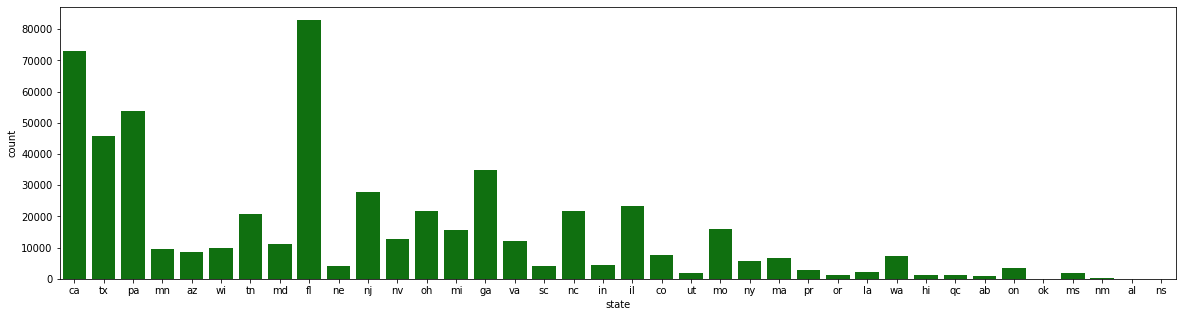

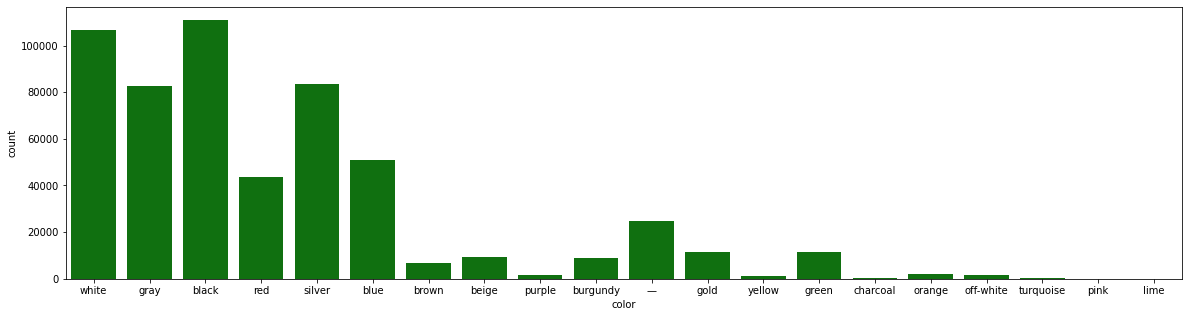

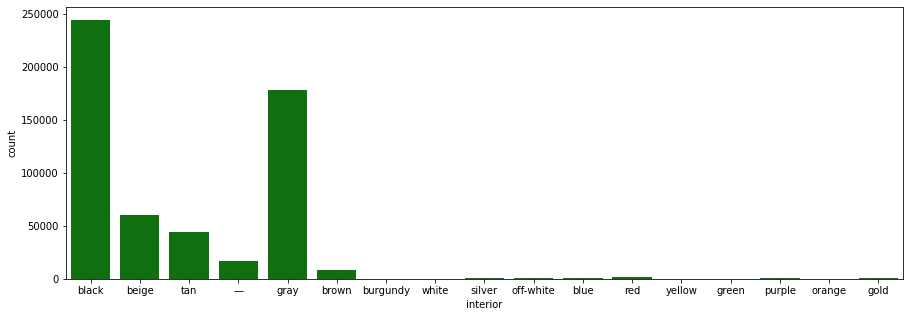

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(df['state'], color='green', orient='v')
plt.figure(figsize=(20, 5))
sns.countplot(df['color'], color='green', orient='v')
plt.figure(figsize=(15, 5))
sns.countplot(df['interior'], color='green', orient='v')

Text(0.5, 0, 'Brand')

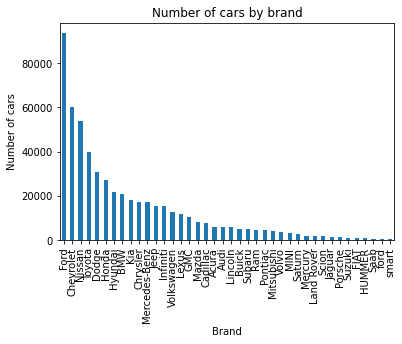

In [ ]:
df.make.value_counts().nlargest(40).plot(kind='bar')
plt.title('Number of cars by brand')
plt.ylabel('Number of cars')
plt.xlabel('Brand')

**HASIL PENGAMATAN:** <br>
- x
- x

# **3. Multivariate Analysis**

## 3.1 Numerical Features

### 3.1.1 Correlation Heatmap <br>

Hal- hal yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target?
- Apakah ada 2 feature yang berkorelasi kuat (abs (>0.7))? Bila ya, ada kemungkinan besar kedua feature tersebut 
redundan [**Multicollinearity**](https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences).

In [ ]:
df.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


<AxesSubplot:>

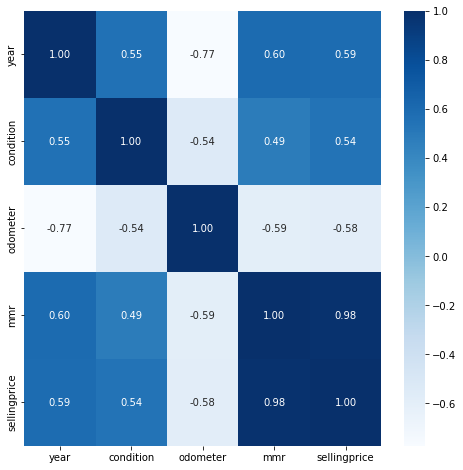

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**HASIL PENGAMATAN:** <br>
- Target kita `sellingprice` korelasi positif cukup kuat dengan `mmr`, `year` dan `condition` (strong potential feature)
- Sedangkan korelasi `sellingprice` dengan `odometer` adalah negatif cukup kuat
- `year` memiliki korelasi positif cukup kuat dengan `mmr`. Ada kemungkinan kedua *feature* ini redundan (dipilih salah satunya saja untuk training data)

### 3.1.2 Pairplot

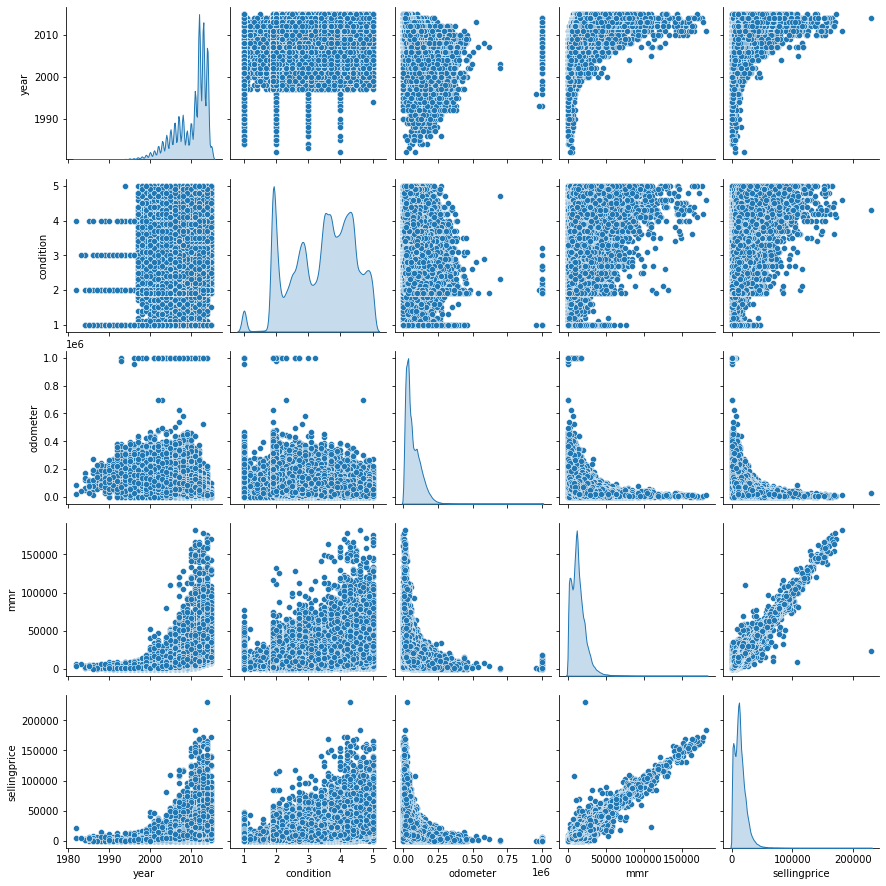

In [ ]:
sns.pairplot(df, diag_kind='kde')

**HASIL PENGAMATAN:** <br>
- `year` diatas 2000 memiliki `sellingprice` yang tinggi
- mobil dengan `condition` > 3 memiliki `sellingprice` yang tinggi
- semakin sedikit `odometer` maka `sellingprice` tinggi
- `sellingprice` dan `mmr` sangat jelas memiliki korelasi linear

## 3.2 Non-Numerical Features

### 3.2.1 Categorical columns vs Target Variable

In [ ]:
cat

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

In [ ]:
df[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


https://seaborn.pydata.org/generated/seaborn.kdeplot.html


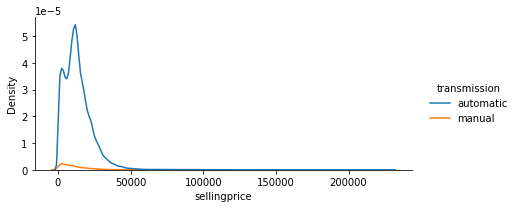

In [ ]:
sns.displot(data=df,x='sellingprice',kind='kde',hue='transmission',height=3,aspect=2)

<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

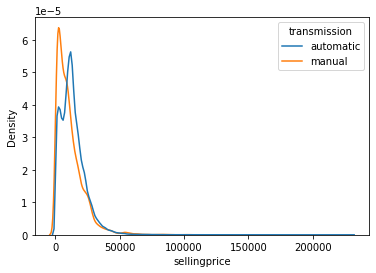

In [ ]:
# normalisasi
sns.kdeplot(data=df, x='sellingprice',hue='transmission',common_norm=False)

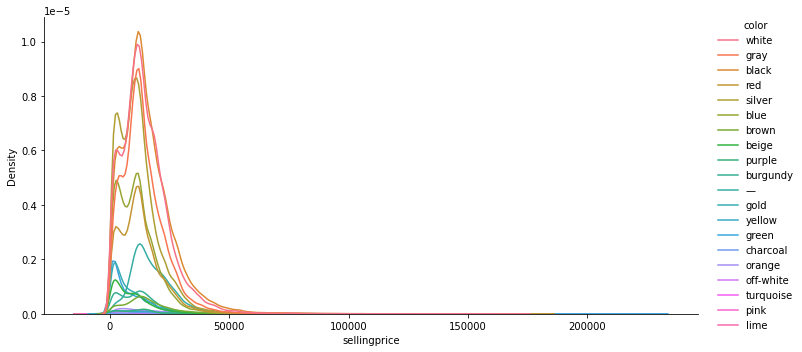

In [ ]:
sns.displot(data=df,x='sellingprice',kind='kde',hue='color',height=5,aspect=2)

<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

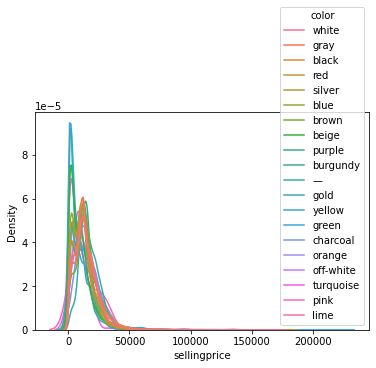

In [ ]:
# normalisasi
sns.kdeplot(data=df, x='sellingprice',hue='color',common_norm=False)

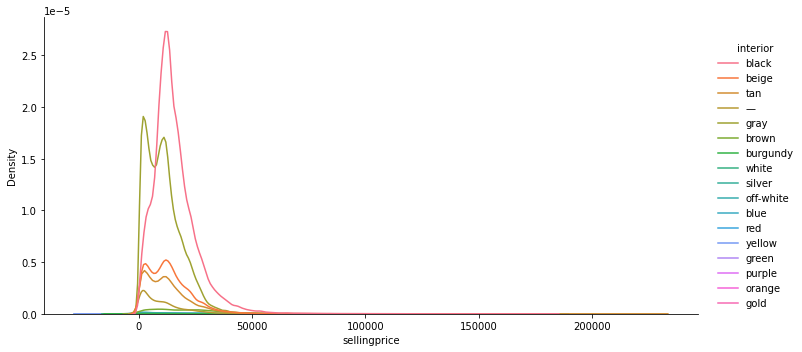

In [ ]:
sns.displot(data=df,x='sellingprice',kind='kde',hue='interior',height=5,aspect=2)

<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

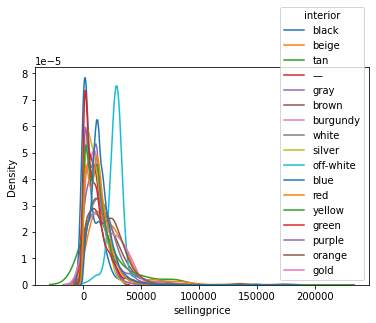

In [ ]:
# normalisasi
sns.kdeplot(data=df, x='sellingprice',hue='interior',common_norm=False, palette="tab10")

**HASIL PENGAMATAN**<br>
- Mobil dengan `transmission` automatic lebih banyak terjual dan memiliki `sellingprice` yang lebih tinggi dibandingkan dengan manual
- Mobil dengan `color` white, black, grey lebih banyak terjual
- `Transmission` automatic dan `interior` black cenderung memiliki `sellingprice` yang tinggi (puncak distribusi berada lebih kanan dibanding yang lain)
- Sepertinya semua `color` sama saja efeknya terhadap `sellingprice`

# **4. Business Insight** <br>

referensi business insight:
- [contoh 1](https://medium.com/mlearning-ai/exploratory-data-analysis-eda-on-myanimelist-data-15134022dc7e)
- [contoh 2](https://blog.jovian.ai/%EF%B8%8Fsupermarket-sales-exploratory-data-analysis-eda-%EF%B8%8F-139a697ac3c3)
- [contoh 3 - dataset yang sama](https://www.kaggle.com/code/desalegngeb/auctioning-used-cars-what-matters-most)
- [contoh 4 - dataset yang sama](https://www.kaggle.com/code/abhi7847/exploratory-data-analysis-eda-for-beginners)


NOTES: didukung data eksternal



## 4.1 jumlah penjualan mobil per tahun produksi

In [ ]:
# Ambil data hanya saledate tahun 2015
saledate_2015 = df[df['saledate'].str.contains('2015')]

# Agregasi
per_year =  saledate_2015.groupby('year').agg({'year':'count',
                                    'sellingprice':'mean'})
per_year.columns = ['total_cars', 'mean_selling_price']
per_year.reset_index(inplace=True)

(8.0, 34.0)

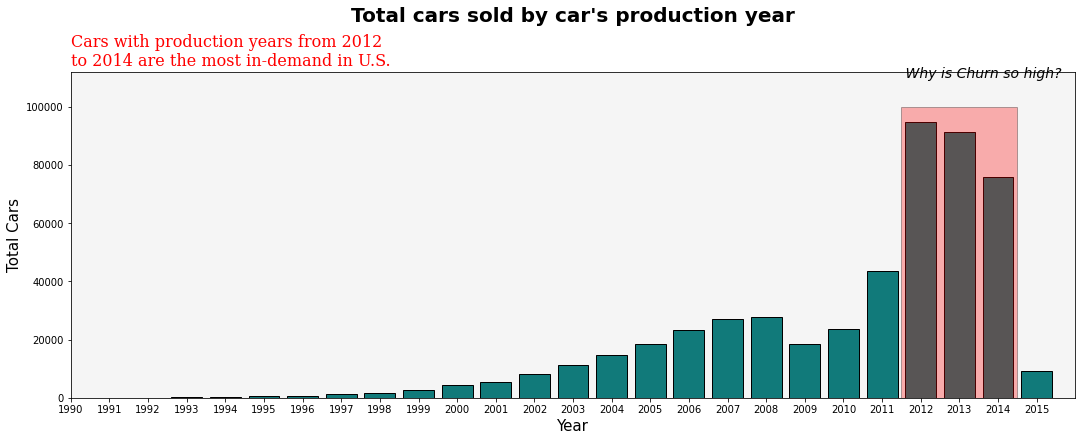

In [ ]:
# plot jumlah penjualan mobil per tahun produksi
plt.figure(figsize=(18,6))

ax = sns.barplot(x='year', y='total_cars', data=per_year,
                 color='#008B8B', edgecolor='black')

ax.set_facecolor("#F5F5F5")

left, bottom, width, height = (29.5, 0, 3, 100000)
rect = mpatches.Rectangle((left,bottom),width,height, fill=True, 
                          alpha=0.3, facecolor='red', edgecolor='black')
plt.gca().add_patch(rect)

plt.title("Total cars sold by car's production year\n\n", fontsize=20, fontweight='bold', fontname="Comic Sans MS")
plt.title("Cars with production years from 2012\nto 2014 are the most in-demand in U.S.",
          fontsize=16, family='serif', loc='left', color='red')


plt.text(29.5, 110000, ' Why is Churn so high?', fontsize=14, fontstyle='italic')


plt.xlabel('Year', fontsize=15)
plt.ylabel('Total Cars', fontsize=15)
plt.ylim(0, 112000)
plt.xlim(8, 34)

**HASIL PENGAMATAN:** <br>
Penjualan mobil terbanyak hingga pertengahan 2015 berasal dari tahun produksi 2012, disusul mobil produksi tahun 2013 dan 2014. Barplot di atas menunjukkan bahwa peminat mobil antik tergolong sangat rendah dan orang lebih tertarik dengan mobil keluaran terbaru.






## 4.2 rata-rata harga mobil per tahun produksi

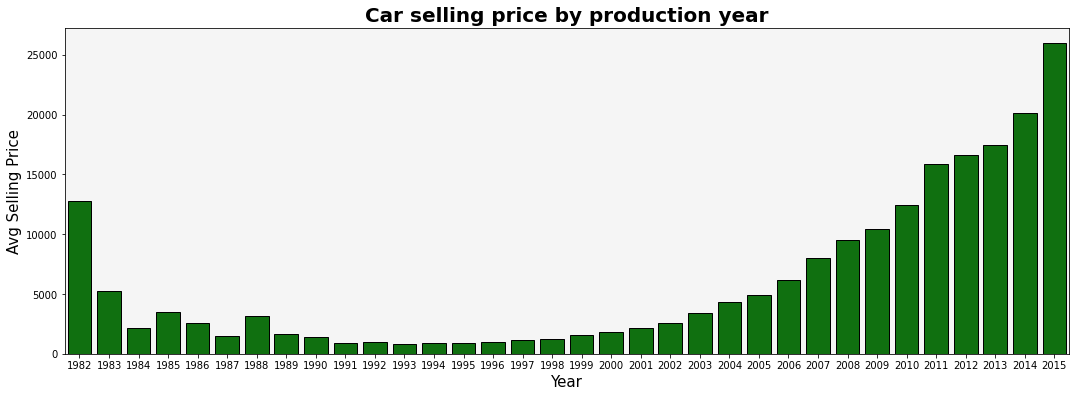

In [ ]:
# plot rata-rata harga mobil per tahun produksi
plt.figure(figsize=(18,6))

ax = sns.barplot(x='year', y='mean_selling_price', data=per_year,
                 color='green', edgecolor='black')

ax.set_facecolor("#F5F5F5")

plt.title('Car selling price by production year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Avg Selling Price', fontsize=15);

**HASIL PENGAMATAN:** <br>
Meskipun mobil produksi tahun 2012 memiliki jumlah penjualan tertinggi, tetapi rata-rata harga jualnya lebih rendah jika dibandingkan mobil produksi tahun 2013 hingga 2015. Menariknya lagi, tahun 1982 juga memiliki harga jual mobil yang cukup tinggi dan kemungkinan ini berkaitan dengan sejumlah mobil antik.

## 4.3 Top 15 brand mobil yang paling laku

In [ ]:
# buat kolom make yang baru untuk memeperbaiki value yang tidak konsisten
df['make_new'] = df['make'].str.lower()
df['make_new'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [ ]:
# Top 15 brand mobil yang paling laku
units_make = df['make_new'].value_counts().reset_index().rename(columns={'index':'make', 'make_new':'total_units'})[:15]

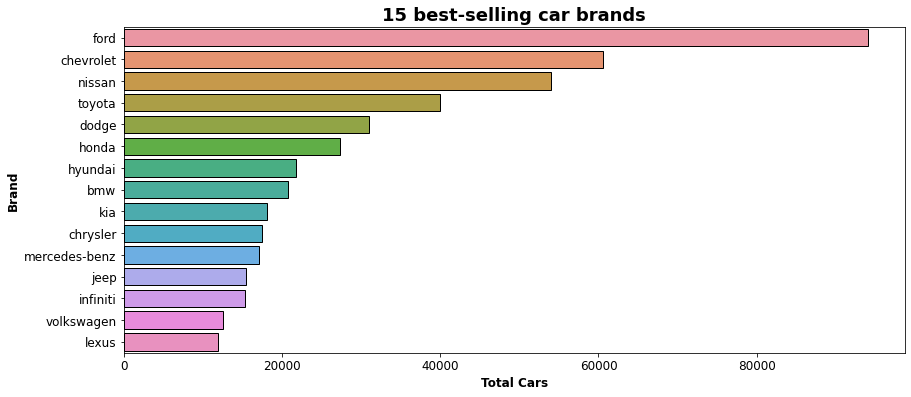

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='total_units', y='make', data=units_make, edgecolor='black')

plt.title('15 best-selling car brands', fontsize=18, fontweight='bold')
plt.xlabel('Total Cars', fontsize=14, fontweight='bold')
plt.ylabel('Brand', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

## 4.3 Top 15 Brand dan Tahun Produksi yang paling laku
Kita bisa membuat kolom baru untuk melihat brand dengan tahun produksi apa saja yang peminatnya sangat tinggi.

In [ ]:
df['year'] = df['year'].astype(str)
df['make-year'] = df['make_new'] + '-' + df['year']

In [ ]:
# Top 15 brand mobil beserta tahun produksinya yang paling laku
units_make_year = df['make-year'].value_counts().reset_index().rename(columns={'index':'make-year', 'make-year':'total_units'})[:15]

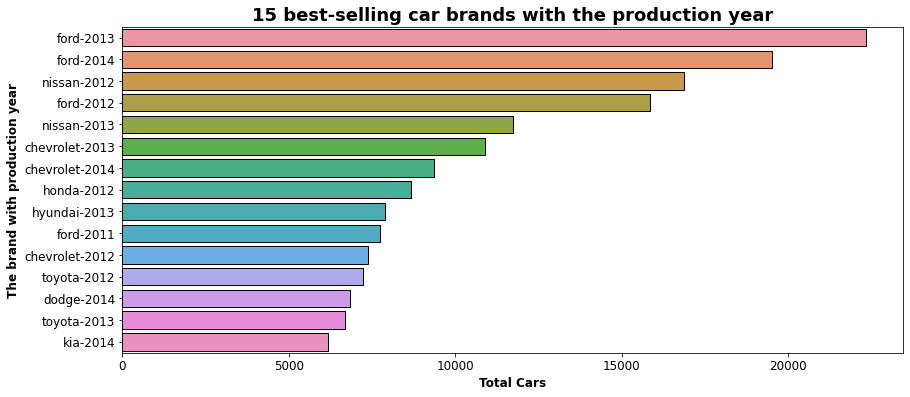

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='total_units', y='make-year', data=units_make_year, edgecolor='black')

plt.title('15 best-selling car brands with the production year', fontsize=18, fontweight='bold')
plt.xlabel('Total Cars', fontsize=14, fontweight='bold')
plt.ylabel('The brand with production year', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

**HASIL PENGAMATAN:** <br>
Berdasarkan kombinasi kolom merek dan tahun produksi, kita dapat mengamati bahwa mobil Ford tahun 2013 merupakan mobil yang paling laris dibeli, lalu diikuti oleh Ford 2014, Nissan 2012, Ford 2012, dan seterusnya. 

## 4.4 Odometer vs Selling Price

Odometer atau millage adalah salah satu fitur terpenting yang akan diminati pembeli saat membeli mobil bekas.
Umumnya semakin sedikit km pada odometer mobil bekas berarti semakin tinggi harga jualnya. Namun, dalam beberapa keadaan khusus, orang dapat membayar suatu mobil tanpa benar-benar memperhatikan odometer. Mari kita tren dalam dataset ini.

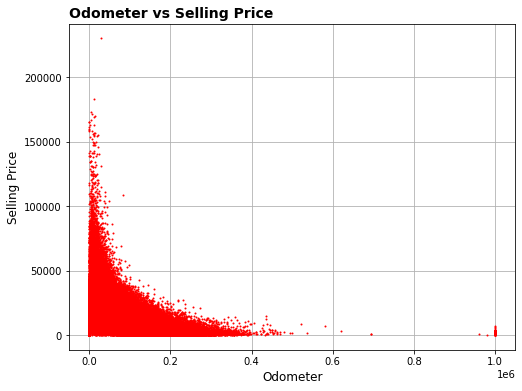

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Odometer vs Selling Price', loc='left', fontsize=14, fontweight='bold')
plt.plot(df['odometer'], df['sellingprice'], '.r', markersize=2)
plt.xlabel('Odometer', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid()
plt.show()

In [ ]:
test_corr = df[['odometer', 'sellingprice']].corr()
test_corr

,odometer,sellingprice
odometer,1.000000,-0.582405
sellingprice,-0.582405,1.000000


**HASIL PENGAMATAN:** <br>
Meskipun secara umum hasil scatter plot di atas menunjukkan bahwa semakin tinggi odometer maka selling price cenderung turun (didukung juga oleh nilai korelasi sekitar -0.6), tetapi terdapat juga odometer yang rendah dengan selling price yang tinggi. Oleh karena itu, kita dapat menyimpulkan bahwa faktor yang mempengaruhi selling price tidak hanya dari odometer saja, tetapi juga dipengaruhi oleh faktor lainnya.

## 4.5 Jumlah penjualan mobil tiap bulan dan tiap hari
[referensi weekday in pandas](https://datascienceparichay.com/article/pandas-check-weekday-or-weekend/)

In [ ]:
print('format saledate original\n', df.saledate[0])

format saledate original
 Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df['saledate'] = df['saledate'].apply(lambda x:re.search('(\w+\s\d{2}\s\d{4})',x).group(1))
df['saledate'] = pd.to_datetime(df['saledate'], format='%b %d %Y')
df['saledate']

0        2014-12-16
1        2014-12-16
2        2015-01-15
3        2015-01-29
4        2014-12-18
            ...    
558806   2015-07-09
558807   2015-07-08
558808   2015-07-08
558809   2015-07-09
558810   2015-05-28
Name: saledate, Length: 558811, dtype: datetime64[ns]

In [ ]:
# buat kolom Bulan dan Tahun penjualan mobil dari saledate
df['saledate_month'] = df['saledate'].dt.month
df['saledate_year'] = df['saledate'].dt.year

In [ ]:
# buat kolom hari dalam seminggu dari saledate
df["saledate_DayOfWeek"] = df["saledate"].dt.weekday
df["saledate_DayOfWeek"]

0         1
1         1
2         3
3         3
4         3
         ..
558806    3
558807    2
558808    2
558809    3
558810    3
Name: saledate_DayOfWeek, Length: 558811, dtype: int64

In [ ]:
# Jumlah penjualan mobil per tiap bulan
month_selling_car = df.groupby(['saledate_year', 'saledate_month']).agg({'year':'count'}).reset_index()
month_selling_car.rename(columns={'year':'total_units'}, inplace=True)
month_selling_car

,saledate_year,saledate_month,total_units
0,2014,1,206
1,2014,2,1
2,2014,12,53520
3,2015,1,140609
4,2015,2,163053
5,2015,3,46277
6,2015,4,1450
7,2015,5,52451
8,2015,6,99944
9,2015,7,1300


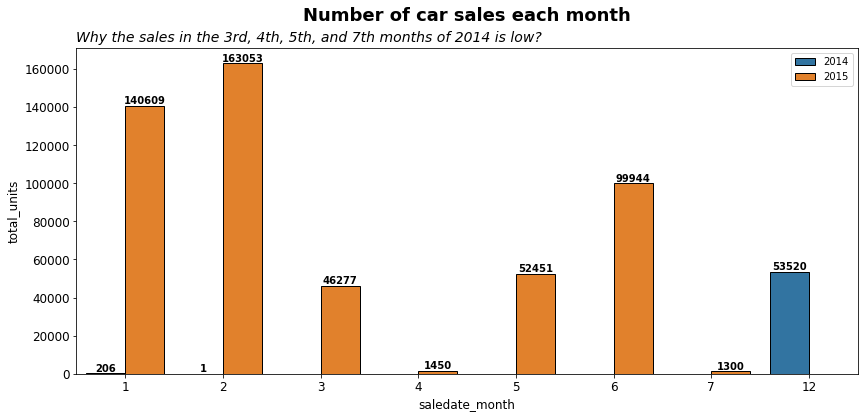

In [ ]:
# Plot Jumlah penjualan mobil per tiap bulan
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='saledate_month', y='total_units', data=month_selling_car, edgecolor='black',
                 hue=	'saledate_year')
plt.legend(loc='upper right')

plt.title('Number of car sales each month\n', fontsize=18, fontweight='bold')
plt.title('Why the sales in the 3rd, 4th, 5th, and 7th months of 2014 is low?', loc='left',
          fontsize=14, fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

for label in ax.containers:
    ax.bar_label(label, fontweight='bold')

**HASIL PENGAMATAN:** <br>
- Dataset ini hanya merekam penjualan mobil dari tahun 2014 dan 2015. Tahun 2015 hanya memiliki data penjualan dari bulan Januari hingga Juli, sedangkan 2014 hanya pada bulan Januari, Februari, dan Desember.

- Kurangnya data pada tahun 2014 menyulitkan kami untuk menganalisis penjualan mobil di tahun ini.

- Jika ditinjau hanya dari tahun 2015, kita dapat melihat bahwa bulan Januari dan Februari memiliki jumlah penjualan mobil paling banyak. Apakah warga Amerika akan cenderung membeli mobil di awal tahun? 

- Sedangkan, untuk bulan Maret, April, Mei, dan Juli di tahun 2015 justru memiliki jumlah penjualan mobil yang lebih rendah. Ada apa dengan bulan-bulan ini?

## 4.6 Jumlah penjualan mobil tiap hari

In [ ]:
# Jumlah penjualan mobil per tiap haris
weekday_selling_car = df.groupby(['saledate_year', 'saledate_DayOfWeek']).agg({'year':'count'}).reset_index()
weekday_selling_car.rename(columns={'year':'total_units'}, inplace=True)
weekday_selling_car

,saledate_year,saledate_DayOfWeek,total_units
0,2014,0,2144
1,2014,1,19320
2,2014,2,10927
3,2014,3,17083
4,2014,4,4229
5,2014,6,24
6,2015,0,13625
7,2015,1,144639
8,2015,2,155142
9,2015,3,136670


In [ ]:
# ubah weekday integer menjadi string
old = [0, 1, 2, 3, 4, 5, 6]
new = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_selling_car.saledate_DayOfWeek = weekday_selling_car.saledate_DayOfWeek.replace(old, new)

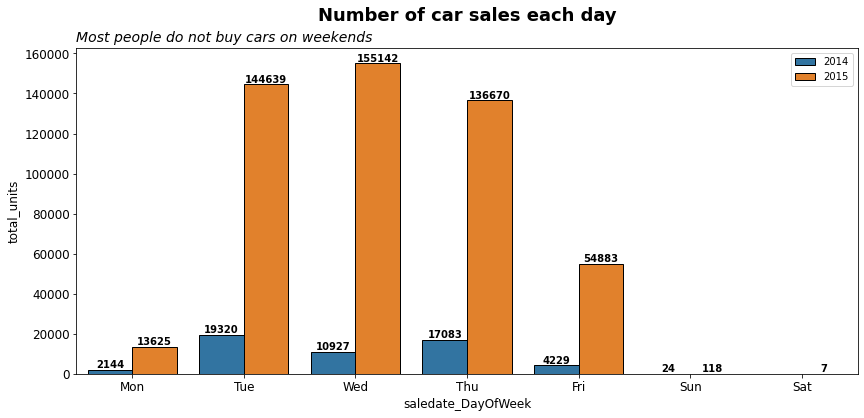

In [ ]:
# Plot Jumlah penjualan mobil per tiap hari
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='saledate_DayOfWeek', y='total_units', data=weekday_selling_car, edgecolor='black',
                 hue=	'saledate_year')
plt.legend(loc='upper right')

plt.title('Number of car sales each day\n', fontsize=18, fontweight='bold')
plt.title('Most people do not buy cars on weekends', loc='left',
          fontsize=14, fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

for label in ax.containers:
    ax.bar_label(label, fontweight='bold')

**HASIL PENGAMATAN:** <br>
Fakta menarik yang ditemukan dari plot di atas adalah mayoritas warga amerika cenderung tidak memilih untuk membeli mobil di akhir pekan. Mereka lebih memilih untuk membeli mobil di pertengahan, seperti hari selasa hingga jumat.

## 4.7 Body mobil yang paling laku

In [ ]:
df['body'] = df.body.str.lower()

In [ ]:
# Top 10 body mobil yang paling laku
units_body = df['body'].value_counts().reset_index().rename(columns={'index':'body', 'body':'total_units'})[:10]
units_body

,body,total_units
0,sedan,241343
1,suv,143844
2,hatchback,26237
3,minivan,25529
4,coupe,17752
5,crew cab,16394
6,wagon,16129
7,convertible,10476
8,supercrew,9033
9,g sedan,7417


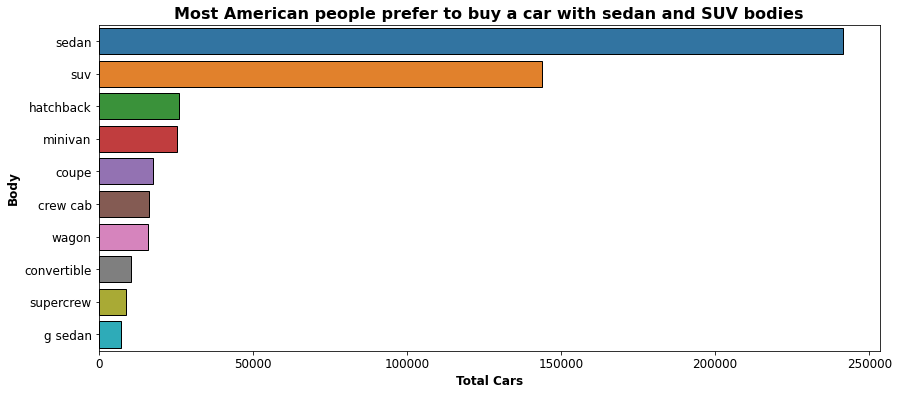

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='total_units', y='body', data=units_body, edgecolor='black')

plt.title('Most American people prefer to buy a car with sedan and SUV bodies', fontsize=16, fontweight='bold')
plt.xlabel('Total Cars', fontsize=14, fontweight='bold')
plt.ylabel('Body', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

## 4.8 Transmisi mobil yang paling diminati

In [ ]:
units_transmission = df.groupby('transmission').agg({'year':'count'}).reset_index()
units_transmission.columns = ['transmission', 'total_units']
units_transmission['percentage'] = units_transmission['total_units'].apply(
    lambda x: round(x/units_transmission['total_units'].sum()*100, 2))
units_transmission

,transmission,total_units,percentage
0,automatic,475914,96.44
1,manual,17544,3.56


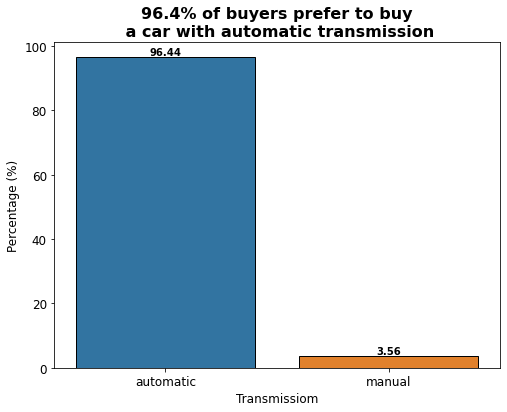

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='transmission', y='percentage', data=units_transmission, edgecolor='black')

plt.title('96.4% of buyers prefer to buy\n a car with automatic transmission', fontsize=16, fontweight='bold')
plt.xlabel('Transmissiom', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

for label in ax.containers:
    ax.bar_label(label, fontweight='bold')

## 4.9 Market segmentation

## 4.10 Warna mobil

In [ ]:
units_color = df['color'].value_counts().reset_index().rename(columns={'index':'color', 'color':'total_units'})
units_color

,color,total_units
0,black,110970
1,white,106673
2,silver,83389
3,gray,82857
4,blue,51139
5,red,43569
6,—,24685
7,green,11382
8,gold,11342
9,beige,9222


In [ ]:
units_color.color = units_color.color.replace('—', 'unknown')

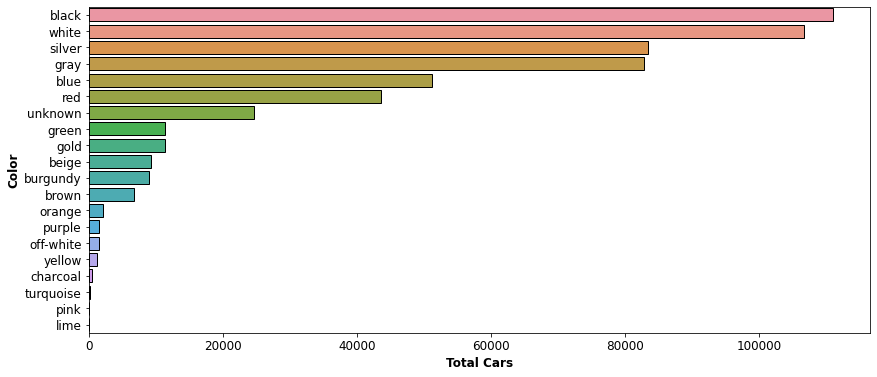

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='total_units', y='color', data=units_color, edgecolor='black')

plt.title('', fontsize=16, fontweight='bold')
plt.xlabel('Total Cars', fontsize=14, fontweight='bold')
plt.ylabel('Color', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)